In [54]:
import pandas as pd
import numpy as np

#### Limpieza inicial

In [55]:
salud19 = pd.read_csv('..\ENDES_2019-2023\CSALUD_2019.csv')
salud20 = pd.read_csv('..\ENDES_2019-2023\CSALUD_2020.csv')
salud21 = pd.read_csv('..\ENDES_2019-2023\CSALUD_2021.csv')
salud22 = pd.read_csv('..\ENDES_2019-2023\CSALUD_2022.csv')
salud23 = pd.read_csv('..\ENDES_2019-2023\CSALUD_2023.csv')

aux_map = {"LONGITUDX": "longitudx",
           "LATITUDY": "latitudy"}
salud22 = salud22.rename(columns=aux_map)
salud23 = salud23.rename(columns=aux_map)

salud = pd.concat([salud19, salud20, salud21, salud22, salud23])

salud.columns = salud.columns.str.lower()
salud

id1       hhid qhcluster qhnumber qhhome qsnumero qsresult qs20c  \
0      2019     100201         1        2      1        2        1     2   
1      2019     102801         1       28      1        2        1     2   
2      2019     104801         1       48      1        2        1     2   
3      2019     113601         1      136      1        2        1     2   
4      2019     113701         1      137      1        2        2         
...     ...        ...       ...      ...    ...      ...      ...   ...   
37481  2023  542903401      5429       34      1        2        2         
37482  2023  542904501      5429       45      1        2        1     2   
37483  2023  542904701      5429       47      1        1        1     1   
37484  2023  542904901      5429       49      1        4        5     4   
37485  2023  542905001      5429       50      1        2        1     2   

      qssexo qs23  ... hv023 hv024 hv025 hv026  ubigeo nconglome codccpp  \
0          2   33  ...     1     1     1     1   10101      7065       1   
1          2   36  ...     1     1     1     1   10101      7065       1   
2          2   28  ...     1     1     1     1   10101      7065       1   
3          2   30  ...     1     1     1     1   10101      7065       1   
4                  ...     1     1     1     1   10101      7065       1   
...      ...  ...  ...   ...   ...   ...   ...     ...       ...     ...   
37481              ...    18    18     2     3  180202   4381201       1   
37482      2   56  ...    18    18     2     3  180202   4381201       1   
37483      1   67  ...    18    18     2     3  180202   4381201       1   
37484      2   55  ...    18    18     2     3  180202   4381201       1   
37485      2   57  ...    18    18     2     3  180202   4381201       1   

           nomccpp longitudx   latitudy  
0      CHACHAPOYAS -77.87383  -6.223320  
1      CHACHAPOYAS -77.87383  -6.223320  
2      CHACHAPOYAS -77.87383  -6.223320  
3      CHACHAPOYAS -77.87383  -6.223320  
4      CHACHAPOYAS -77.87383  -6.223320  
...            ...       ...        ...  
37481      CHOJATA -70.73015 -16.388538  
37482      CHOJATA -70.73015 -16.388538  
37483      CHOJATA -70.73015 -16.388538  
37484      CHOJATA -70.73015 -16.388538  
37485      CHOJATA -70.73015 -16.388538  

[187872 rows x 62 columns]

In [56]:
columnas_dict = {
    "id1": "anio",
    "hhid": "id_hogar",
    "qhcluster": "conglomerado",
    "qhnumber": "vivienda",
    "qhhome": "hogar",
    "qsnumero": "num_persona",
    "qsresult": "cod_resultado",
    "qs20c": "cod_persona",
    "qssexo": "sexo",
    "qs23": "edad",
    "qs24": "asistio_escuela",
    "qs25n": "nivel_aprobado",
    "qs26": "seguro_salud",
    "qs27": "institucion_seguro",
    "qs102": "diagnostico_hipertension",
    "qs903s": "presion_sis_1",
    "qs903d": "presion_dia_1",
    "qs905s": "presion_sis_2",
    "qs905d": "presion_dia_2",
    "qs906": "resultado_presion",
    "qs201": "fumo_30d",
    "qs202": "fuma_diario",
    "qs210": "alcohol_30d",
    "qs215u": "dias_jugo_unidad",
    "qs215c": "dias_jugo",
    "qs900": "peso_kg",
    "qs901": "talla_cm",
    "qs902": "resultado_antropometria",
    "qs907": "perimetro_abdominal_cm",
    "qs908": "resultado_perimetro_abd",
    "hv023": "dominio",
    "hv024": "region",
    "hv025": "area_residencia",
    "hv026": "lugar_residencia",
    "ubigeo": "codigo_ubicacion_geo",
    "nconglome": "num_conglomerado",
    "codccpp": "codigo_centro_poblado",
    "nomccpp": "nombre_centro_poblado",
    "latitudy": "latitud",
    "longitudx": "longitud",

    # "qs700a" : "poco_interes_14d",
    # "qs700b" : "deprimido_14d"
}

In [57]:
salud_mental = [
    "qs700a", "qs700b", "qs700c", "qs700d", "qs700e", "qs700f", "qs700g", "qs700h", "qs700i",
    "qs702", "qs703", "qs704a", "qs704b", "qs704c", "qs704d", "qs704e", "qs704f", "qs704g",
    "qs704h", "qs704i", "qs706", "qs709"
]

salud.drop(columns=salud_mental, inplace=True)

# Renombramos las columnas según el mapeo
for col in salud.columns:
    salud.rename(columns={col: columnas_dict[col]}, inplace=True)

salud

anio   id_hogar conglomerado vivienda hogar num_persona cod_resultado  \
0      2019     100201            1        2     1           2             1   
1      2019     102801            1       28     1           2             1   
2      2019     104801            1       48     1           2             1   
3      2019     113601            1      136     1           2             1   
4      2019     113701            1      137     1           2             2   
...     ...        ...          ...      ...   ...         ...           ...   
37481  2023  542903401         5429       34     1           2             2   
37482  2023  542904501         5429       45     1           2             1   
37483  2023  542904701         5429       47     1           1             1   
37484  2023  542904901         5429       49     1           4             5   
37485  2023  542905001         5429       50     1           2             1   

      cod_persona sexo edad  ... dominio region area_residencia  \
0               2    2   33  ...       1      1               1   
1               2    2   36  ...       1      1               1   
2               2    2   28  ...       1      1               1   
3               2    2   30  ...       1      1               1   
4                            ...       1      1               1   
...           ...  ...  ...  ...     ...    ...             ...   
37481                        ...      18     18               2   
37482           2    2   56  ...      18     18               2   
37483           1    1   67  ...      18     18               2   
37484           4    2   55  ...      18     18               2   
37485           2    2   57  ...      18     18               2   

      lugar_residencia codigo_ubicacion_geo num_conglomerado  \
0                    1                10101             7065   
1                    1                10101             7065   
2                    1                10101             7065   
3                    1                10101             7065   
4                    1                10101             7065   
...                ...                  ...              ...   
37481                3               180202          4381201   
37482                3               180202          4381201   
37483                3               180202          4381201   
37484                3               180202          4381201   
37485                3               180202          4381201   

      codigo_centro_poblado nombre_centro_poblado  longitud    latitud  
0                         1           CHACHAPOYAS -77.87383  -6.223320  
1                         1           CHACHAPOYAS -77.87383  -6.223320  
2                         1           CHACHAPOYAS -77.87383  -6.223320  
3                         1           CHACHAPOYAS -77.87383  -6.223320  
4                         1           CHACHAPOYAS -77.87383  -6.223320  
...                     ...                   ...       ...        ...  
37481                     1               CHOJATA -70.73015 -16.388538  
37482                     1               CHOJATA -70.73015 -16.388538  
37483                     1               CHOJATA -70.73015 -16.388538  
37484                     1               CHOJATA -70.73015 -16.388538  
37485                     1               CHOJATA -70.73015 -16.388538  

[187872 rows x 40 columns]

In [58]:
estado_encuesta = {
    "1": "completa",
    "2": "ausente",
    "3": "aplazada",
    "4": "rechazada",
    "5": "incompleta",
    "6": "discapacitado",
    "9": "otra"
}
salud["cod_resultado"] = salud["cod_resultado"].map(estado_encuesta)

sexo_dict = {
    "1": "hombre",
    "2": "mujer"
}
salud["sexo"] = salud["sexo"].map(sexo_dict)

boolean_dict = {
    "1": "si",
    "2": "no"
}
salud["asistio_escuela"] = salud["asistio_escuela"].map(boolean_dict)

nivel_educativo_dict = {
    "0": "inicial_preescolar",
    "1": "primaria",
    "2": "secundaria",
    "3": "superior_no_universitaria",
    "4": "superior_universitaria",
    "5": "postgrado"
}
salud["nivel_aprobado"] = salud["nivel_aprobado"].map(nivel_educativo_dict)

salud["seguro_salud"] = salud["seguro_salud"].map(boolean_dict)

respuesta_dict = {
    "1": "si",
    "2": "no",
    "8": "no_sabe_no_recuerda"
}
salud["diagnostico_hipertension"] = salud["diagnostico_hipertension"].map(respuesta_dict)

medicion_dict = {
    "1": "medido",
    "2": "no_presente",
    "3": "rechazo",
    "6": "otro"
}
salud["resultado_presion"] = salud["resultado_presion"].map(medicion_dict)

salud["fumo_30d"] = salud["fumo_30d"].map(respuesta_dict)

salud["fuma_diario"] = salud["fuma_diario"].map(boolean_dict)

salud["alcohol_30d"] = salud["alcohol_30d"].map(respuesta_dict)

dias_consumo_dict = {
    "1": "numero_dias",
    "3": "no_tomo",
    "8": "no_sabe_no_recuerda"
}
salud["dias_jugo_unidad"] = salud["dias_jugo_unidad"].map(dias_consumo_dict)

medicion_dict = {
    "1": "medido",
    "2": "no_presente",
    "3": "rechazo",
    "4": "evaluado_c_hogar",
    "5": "medido_parcialmente",
    "6": "otro"
}
salud["resultado_antropometria"] = salud["resultado_antropometria"].map(medicion_dict)

salud["resultado_perimetro_abd"] = salud["resultado_perimetro_abd"].map(medicion_dict)

regiones_dict = {
    1: "amazonas",
    2: "ancash",
    3: "apurimac",
    4: "arequipa",
    5: "ayacucho",
    6: "cajamarca",
    7: "callao",
    8: "cusco",
    9: "huancavelica",
    10: "huanuco",
    11: "ica",
    12: "junin",
    13: "la_libertad",
    14: "lambayeque",
    15: "lima",
    16: "loreto",
    17: "madre_de_dios",
    18: "moquegua",
    19: "pasco",
    20: "piura",
    21: "puno",
    22: "san_martin",
    23: "tacna",
    24: "tumbes",
    25: "ucayali"
}
salud["dominio"] = salud["dominio"].map(regiones_dict)

salud["region"] = salud["region"].map(regiones_dict)

area_residencia_dict = {
    1: "urbano",
    2: "rural"
}
salud["area_residencia"] = salud["area_residencia"].map(area_residencia_dict)

lugar_residencia_dict = {
    0: "capital_gran_ciudad",
    1: "pequena_ciudad",
    2: "pueblo",
    3: "campo"
}
salud["lugar_residencia"] = salud["lugar_residencia"].map(lugar_residencia_dict)

In [59]:
salud["presion_sis_1"] = pd.to_numeric(salud["presion_sis_1"], errors="coerce")

salud["peso_kg"] = pd.to_numeric(salud["peso_kg"], errors="coerce")
salud["talla_cm"] = pd.to_numeric(salud["talla_cm"], errors="coerce")

salud["perimetro_abdominal_cm"] = pd.to_numeric(salud["perimetro_abdominal_cm"], errors="coerce")

In [60]:
# salud.to_excel("salud.xlsx", index=False)

#### Plots antiguos

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# print(salud.institucion_seguro.value_counts())

In [10]:
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=salud[(salud.longitud < -60) & (salud.latitud > -30)],
#                 x='longitud',
#                 y='latitud',
#                 hue='diagnostico_hipertension',
#                 palette="coolwarm", alpha=0.6)

# plt.title("Distribución de la Hipertensión por Ubicación")
# plt.xlabel("Longitud")
# plt.ylabel("Latitud")
# plt.legend(title="Hipertensión")
# plt.show()


In [11]:
# sns.boxplot(data=presion_agrupada, y='region', x='presion_sis_1', orient="h")
# plt.title("Presión Sistólica por Región")
# plt.xlabel("Región")
# plt.ylabel("Presión Sistólica")
# plt.show()

In [12]:
# presion_agrupada = salud.groupby(["region", "anio"]).agg({"presion_sis_1": "mean", "id_hogar": "count"}).reset_index()
# display(presion_agrupada)
# presion_agrupada.columns = ["region", "anio", "presion_sis_1", "conteo"]
# # PROMEDIAR AMBAS MEDICIONES DE SISTOLE

# plt.figure(figsize=(12, 6))
# sns.lineplot(data=presion_agrupada, x='anio', y='presion_sis_1', hue='region')
# plt.title("Presión Sistólica Promedio por Año y Región")
# plt.xticks(presion_agrupada.anio.unique())
# plt.xlabel("Año")
# plt.ylabel("Presión Sistólica Promedio")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

In [13]:
# porc_seguro_por_region = salud.groupby(["region", "anio", "seguro_salud"]).agg({"id_hogar": "count"}).reset_index()
# display(porc_seguro_por_region)
# porc_seguro_por_region.columns = ["region", "anio", "seguro_salud", "conteo"]
# porc_seguro_por_region = porc_seguro_por_region.pivot_table(index=["region", "anio"], columns="seguro_salud", values="conteo").reset_index()
# display(porc_seguro_por_region)
# porc_seguro_por_region["total"] = porc_seguro_por_region["si"] + porc_seguro_por_region["no"]
# porc_seguro_por_region["porcentaje_seguro"] = porc_seguro_por_region["si"] / porc_seguro_por_region["total"] * 100
# display(porc_seguro_por_region)

In [14]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=porc_seguro_por_region, x='anio', y='porcentaje_seguro', hue='region')
# plt.title("Porcentaje de Personas con Seguro de Salud por Año y Región")
# plt.xticks(porc_seguro_por_region.anio.unique())
# plt.xlabel("Año")
# plt.ylabel("Porcentaje de Personas con Seguro de Salud")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

In [15]:
# porc_hipertension_por_region = salud.groupby(["region", "anio", "diagnostico_hipertension"]).agg({"id_hogar": "count"}).reset_index()
# porc_hipertension_por_region.columns = ["region", "anio", "diagnostico_hipertension", "conteo"]
# porc_hipertension_por_region = porc_hipertension_por_region.pivot_table(index=["region", "anio"], columns="diagnostico_hipertension", values="conteo").reset_index()
# porc_hipertension_por_region["total"] = porc_hipertension_por_region["si"] + porc_hipertension_por_region["no"]
# porc_hipertension_por_region["porcentaje_hipertension"] = porc_hipertension_por_region["si"] / porc_hipertension_por_region["total"] * 100

In [16]:
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=porc_hipertension_por_region, x='anio', y='porcentaje_hipertension', hue='region')
# plt.title("Porcentaje de Personas con Hipertensión por Año y Región")
# plt.xticks(porc_hipertension_por_region.anio.unique())
# plt.xlabel("Año")
# plt.ylabel("Porcentaje de Personas con Hipertensión")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

In [17]:
display(salud)

anio   id_hogar conglomerado vivienda hogar num_persona cod_resultado  \
0      2019     100201            1        2     1           2      completa   
1      2019     102801            1       28     1           2      completa   
2      2019     104801            1       48     1           2      completa   
3      2019     113601            1      136     1           2      completa   
4      2019     113701            1      137     1           2       ausente   
...     ...        ...          ...      ...   ...         ...           ...   
37481  2023  542903401         5429       34     1           2       ausente   
37482  2023  542904501         5429       45     1           2      completa   
37483  2023  542904701         5429       47     1           1      completa   
37484  2023  542904901         5429       49     1           4    incompleta   
37485  2023  542905001         5429       50     1           2      completa   

      cod_persona    sexo edad  ...   dominio    region area_residencia  \
0               2   mujer   33  ...  amazonas  amazonas          urbano   
1               2   mujer   36  ...  amazonas  amazonas          urbano   
2               2   mujer   28  ...  amazonas  amazonas          urbano   
3               2   mujer   30  ...  amazonas  amazonas          urbano   
4                     NaN       ...  amazonas  amazonas          urbano   
...           ...     ...  ...  ...       ...       ...             ...   
37481                 NaN       ...  moquegua  moquegua           rural   
37482           2   mujer   56  ...  moquegua  moquegua           rural   
37483           1  hombre   67  ...  moquegua  moquegua           rural   
37484           4   mujer   55  ...  moquegua  moquegua           rural   
37485           2   mujer   57  ...  moquegua  moquegua           rural   

      lugar_residencia codigo_ubicacion_geo num_conglomerado  \
0       pequena_ciudad                10101             7065   
1       pequena_ciudad                10101             7065   
2       pequena_ciudad                10101             7065   
3       pequena_ciudad                10101             7065   
4       pequena_ciudad                10101             7065   
...                ...                  ...              ...   
37481            campo               180202          4381201   
37482            campo               180202          4381201   
37483            campo               180202          4381201   
37484            campo               180202          4381201   
37485            campo               180202          4381201   

      codigo_centro_poblado nombre_centro_poblado  longitud    latitud  
0                         1           CHACHAPOYAS -77.87383  -6.223320  
1                         1           CHACHAPOYAS -77.87383  -6.223320  
2                         1           CHACHAPOYAS -77.87383  -6.223320  
3                         1           CHACHAPOYAS -77.87383  -6.223320  
4                         1           CHACHAPOYAS -77.87383  -6.223320  
...                     ...                   ...       ...        ...  
37481                     1               CHOJATA -70.73015 -16.388538  
37482                     1               CHOJATA -70.73015 -16.388538  
37483                     1               CHOJATA -70.73015 -16.388538  
37484                     1               CHOJATA -70.73015 -16.388538  
37485                     1               CHOJATA -70.73015 -16.388538  

[187872 rows x 40 columns]

#### LIMPIEZA E IMPUTACIÓN DE ROWS

In [ ]:
display(salud)

* num_persona

In [13]:
#convierte los valores de la columna num_persona " " a nan
salud["num_persona"] = pd.to_numeric(salud["num_persona"], errors="coerce")

print(salud["num_persona"].isna().sum())

15546


In [14]:
#imputa los valores nan de la columna num_persona de salud con el valor 0
salud["num_persona"].fillna(0, inplace=True)

#convierte la columna num_persona a objeto
salud["num_persona"] = salud["num_persona"].astype(str)

C:\Users\dial_\AppData\Local\Temp\ipykernel_16152\118645622.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salud["num_persona"].fillna(0, inplace=True)


Estoy creando un id_encuesta porque hay 35 645 row con el mismo id_hogar, pero son diferentes encuestas, en diferentes años y posiblemente diferentes personas. 

In [15]:
#muestrame los row de salud donde la columna id_hogar se repite
(salud[salud.duplicated(subset=["id_hogar"], keep=False)])

anio   id_hogar conglomerado vivienda hogar num_persona cod_resultado  \
1      2019     102801            1       28     1         2.0      completa   
42     2019     501101            5       11     1         5.0      completa   
46     2019     508001            5       80     1         1.0      completa   
47     2019     509801            5       98     1         2.0      completa   
52     2019     602501            6       25     1         3.0      completa   
...     ...        ...          ...      ...   ...         ...           ...   
24925  2023  433902201         4339       22     1         2.0      completa   
24926  2023  433902401                                     0.0           NaN   
24927  2023  433902501         4339       25     1         1.0      completa   
24968  2023  434200801         4342        8     1         2.0      completa   
24989  2023  434316101         4343      161     1         1.0      completa   

      cod_persona    sexo edad  ...   dominio    region area_residencia  \
1               2   mujer   36  ...  amazonas  amazonas          urbano   
42              5   mujer   20  ...  amazonas  amazonas          urbano   
46              1  hombre   32  ...  amazonas  amazonas          urbano   
47              2   mujer   50  ...  amazonas  amazonas          urbano   
52              3   mujer   79  ...  amazonas  amazonas          urbano   
...           ...     ...  ...  ...       ...       ...             ...   
24925           2  hombre   26  ...   ucayali   ucayali           rural   
24926                 NaN       ...   ucayali   ucayali           rural   
24927           1  hombre   27  ...   ucayali   ucayali           rural   
24968           2   mujer   43  ...     junin     junin           rural   
24989           1  hombre   45  ...      lima      lima          urbano   

          lugar_residencia codigo_ubicacion_geo num_conglomerado  \
1           pequena_ciudad                10101             7065   
42          pequena_ciudad                10101             7088   
46          pequena_ciudad                10101             7088   
47          pequena_ciudad                10101             7088   
52          pequena_ciudad                10101             7097   
...                    ...                  ...              ...   
24925                campo               250106            15618   
24926                campo               250106            15618   
24927                campo               250106            15618   
24968                campo               120302            31199   
24989  capital_gran_ciudad               150136            25531   

      codigo_centro_poblado nombre_centro_poblado   longitud    latitud  
1                         1           CHACHAPOYAS -77.873830  -6.223320  
42                        1           CHACHAPOYAS -77.857490  -6.234700  
46                        1           CHACHAPOYAS -77.857490  -6.234700  
47                        1           CHACHAPOYAS -77.857490  -6.234700  
52                        1           CHACHAPOYAS -77.872510  -6.234240  
...                     ...                   ...        ...        ...  
24925                    23           LOS ANGELES -74.976777  -8.345460  
24926                    23           LOS ANGELES -74.976777  -8.345460  
24927                    23           LOS ANGELES -74.976777  -8.345460  
24968                    37          LOS ZORZALES -75.143710 -10.834600  
24989                     1            SAN MIGUEL -77.079472 -12.090833  

[35645 rows x 40 columns]

In [16]:
#crea una columna id_encuesta en salud por cada row y llena de 1 a n
salud["id_encuesta"] = range(1, len(salud) + 1)

* edad

In [17]:
salud["edad"] = pd.to_numeric(salud["edad"], errors="coerce")
print(salud["edad"].isna().sum())

25204


In [18]:
#MEDIANA POR DOMINIO
mediana_edad = salud.groupby("dominio")["edad"].median()

#IMPUTACIÓN
salud.loc[salud["edad"].isna(), "edad"] = (
    salud.loc[salud["edad"].isna(), "dominio"].map(mediana_edad)
    + np.random.randint(-3, 4, size=salud["edad"].isna().sum()) # del 2019 al 2023
).round(0)

Las variables sexo y diagnóstico_hipertension se imputa utilizando choice(["a", "b"]) porque son categóricas binaria, donde solo existen dos posibles respuestas. 

* sexo

In [19]:
print(salud["sexo"].isna().sum())

# #convierte los nan en "Desconocido"
# salud["sexo"].fillna("Desconocido", inplace=True)

print(salud["sexo"].value_counts())

25203
sexo
mujer     92087
hombre    70582
Name: count, dtype: int64


In [20]:
from scipy.stats import chi2_contingency

for col in ["dominio", "area_residencia", "lugar_residencia"]:
    tabla = pd.crosstab(salud[col], salud["sexo"])
    chi2, p, dof, ex = chi2_contingency(tabla)
    print(f"{col} - p-valor: {p:.4f}")

dominio - p-valor: 0.0000
area_residencia - p-valor: 0.0000
lugar_residencia - p-valor: 0.0000


In [21]:
#IMPUTACIÓN DE SEXO
probs_sexo = salud.groupby("dominio")["sexo"].value_counts(normalize=True).unstack()

def imputar_sexo(row):
    if pd.isna(row["sexo"]):
        return np.random.choice(["hombre", "mujer"], p=[probs_sexo.loc[row["dominio"], "hombre"], probs_sexo.loc[row["dominio"], "mujer"]])
    return row["sexo"]

salud["sexo"] = salud.apply(imputar_sexo, axis=1)

print(salud["sexo"].value_counts())
len(salud["sexo"])

sexo
mujer     106373
hombre     81499
Name: count, dtype: int64


187872

* diagnostico_hipertension

In [22]:
print(salud["diagnostico_hipertension"].value_counts())
print(salud["diagnostico_hipertension"].isna().sum())

diagnostico_hipertension
no                     148778
si                      13716
no_sabe_no_recuerda       173
Name: count, dtype: int64
25205


In [23]:
#convertir los valores no_sabe_no_recuerda a nan
salud["diagnostico_hipertension"] = salud["diagnostico_hipertension"].replace("no_sabe_no_recuerda", np.nan)
print(salud["diagnostico_hipertension"].isna().sum())

25378


In [24]:
#IMPUTACIÓN DE HIPERTENSIÓN
probs_hipertension = salud.groupby("dominio")["diagnostico_hipertension"].value_counts(normalize=True).unstack()

def imputar_hipertension(row):
    if pd.isna(row["diagnostico_hipertension"]):
        return np.random.choice(["si", "no"], p=[probs_hipertension.loc[row["dominio"], "si"], probs_hipertension.loc[row["dominio"], "no"]])
    return row["diagnostico_hipertension"]

salud["diagnostico_hipertension"] = salud.apply(imputar_hipertension, axis=1)

print(salud["diagnostico_hipertension"].value_counts())

diagnostico_hipertension
no    171992
si     15880
Name: count, dtype: int64


* peso_kg, talla_cm, perimetro_abdominal_cm

In [25]:
print(salud["peso_kg"].isna().sum())
print(salud["talla_cm"].isna().sum())
print(salud["perimetro_abdominal_cm"].isna().sum())

33703
33703
33697


In [26]:
# limpieza de los que tienen 999.9
salud["peso_kg"] = salud["peso_kg"].replace(999.9, np.nan)
salud["talla_cm"] = salud["talla_cm"].replace(999.9, np.nan)
salud["perimetro_abdominal_cm"] = salud["perimetro_abdominal_cm"].replace(999.9, np.nan)

In [27]:
#MEDIANA POR DOMINIO
peso_media = salud.groupby("dominio").peso_kg.mean()
talla_media = salud.groupby("dominio").talla_cm.mean()
perimetro_media = salud.groupby("dominio").perimetro_abdominal_cm.mean()

# IMPUTACIÓN
salud.loc[salud["peso_kg"].isna(), "peso_kg"] = (
    salud.loc[salud["peso_kg"].isna(), "dominio"].map(peso_media)  
    + np.random.normal(0, 2, size=salud["peso_kg"].isna().sum())  
).round(1)

salud.loc[salud["talla_cm"].isna(), "talla_cm"] = (
    salud.loc[salud["talla_cm"].isna(), "dominio"].map(talla_media) 
    + np.random.normal(0, 1, size=salud["talla_cm"].isna().sum())
).round(1)

salud.loc[salud["perimetro_abdominal_cm"].isna(), "perimetro_abdominal_cm"] = (
    salud.loc[salud["perimetro_abdominal_cm"].isna(), "dominio"].map(perimetro_media)  
    + np.random.normal(0, 3, size=salud["perimetro_abdominal_cm"].isna().sum()) 
).round(1)


In [28]:
print(salud["peso_kg"].isna().sum())
print(salud["talla_cm"].isna().sum())
print(salud["perimetro_abdominal_cm"].isna().sum())

0
0
0


* presion_sis_1, presion_sis_2, presion_dia_1, presion_dia_2

In [29]:
salud["presion_sis_1"] = pd.to_numeric(salud["presion_sis_1"], errors="coerce")
salud["presion_sis_2"] = pd.to_numeric(salud["presion_sis_2"], errors="coerce")
salud["presion_dia_1"] = pd.to_numeric(salud["presion_dia_1"], errors="coerce")
salud["presion_dia_2"] = pd.to_numeric(salud["presion_dia_2"], errors="coerce")

In [30]:
#limpieza de los que tienen 999.0 a nan
salud["presion_sis_1"] = salud["presion_sis_1"].replace(999.0, np.nan)
salud["presion_sis_2"] = salud["presion_sis_2"].replace(999.0, np.nan)
salud["presion_dia_1"] = salud["presion_dia_1"].replace(999.0, np.nan)
salud["presion_dia_2"] = salud["presion_dia_2"].replace(999.0, np.nan)

print(salud["presion_sis_1"].isna().sum())
print(salud["presion_sis_2"].isna().sum())
print(salud["presion_dia_1"].isna().sum())
print(salud["presion_dia_2"].isna().sum())

36185
36185
36185
36185


In [31]:
#MEDIANA POR DOMINIO
presion_sis_1_media = salud.groupby("dominio").presion_sis_1.mean()
presion_sis_2_media = salud.groupby("dominio").presion_sis_2.mean()
presion_dia_1_media = salud.groupby("dominio").presion_dia_1.mean()
presion_dia_2_media = salud.groupby("dominio").presion_dia_2.mean()

# IMPUTACIÓN
salud.loc[salud["presion_sis_1"].isna(), "presion_sis_1"] = (
    salud.loc[salud["presion_sis_1"].isna(), "dominio"].map(presion_sis_1_media)  
    + np.random.normal(0, 5, size=salud["presion_sis_1"].isna().sum())  
).round(0)

salud.loc[salud["presion_sis_2"].isna(), "presion_sis_2"] = (
    salud.loc[salud["presion_sis_2"].isna(), "dominio"].map(presion_sis_2_media)  
    + np.random.normal(0, 4, size=salud["presion_sis_2"].isna().sum())  
).round(0)

salud.loc[salud["presion_dia_1"].isna(), "presion_dia_1"] = (
    salud.loc[salud["presion_dia_1"].isna(), "dominio"].map(presion_dia_1_media)  
    + np.random.normal(0, 3, size=salud["presion_dia_1"].isna().sum())  
).round(0)

salud.loc[salud["presion_dia_2"].isna(), "presion_dia_2"] = (
    salud.loc[salud["presion_dia_2"].isna(), "dominio"].map(presion_dia_2_media)  
    + np.random.normal(0, 2, size=salud["presion_dia_2"].isna().sum())  
).round(0)

print(salud["presion_sis_1"].isna().sum())
print(salud["presion_sis_2"].isna().sum())
print(salud["presion_dia_1"].isna().sum())
print(salud["presion_dia_2"].isna().sum())

0
0
0
0


#### MODELO RANDOM FOREST PARA IMPUTACIÓN DE EDAD Y SEXO

In [471]:
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [472]:
# # SET DE ENTRENAMIENTO
# XY = salud[["sexo", "dominio", "area_residencia", "lugar_residencia", "anio"]].dropna().to_numpy()
# print(XY)

In [473]:
# # x train y train
# x_train = XY[:,1:5]
# y_train = XY[:,0]
# print(x_train)

In [474]:
# print(y_train)

In [475]:
# # SET DE PRUEBA
# filas = salud[~salud['sexo'].notna()].index

# x_test = salud[["dominio", "area_residencia", "lugar_residencia", "anio"]].iloc[filas].to_numpy()
# print(x_test)

In [476]:
# print(x_train)

In [477]:
# he = OneHotEncoder()
# le = LabelEncoder()

# he.fit(x_train[:,0:3])
# x_train_encoded = he.transform(x_train[:,0:3]).toarray()
# x_train = np.hstack([x_train_encoded, x_train[:,3].reshape(-1,1)])

# le.fit(y_train)
# y_train = le.transform(y_train)

# he.fit(x_test[:,0:3])
# x_test_encoded = he.transform(x_test[:,0:3]).toarray()
# x_test = np.hstack([x_test_encoded, x_test[:,3].reshape(-1,1)])

In [478]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Aplicar SMOTE al conjunto de entrenamiento
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

# print("Distribución después de SMOTE:", Counter(y_train_bal))

In [479]:
# # Entrenar el modelo con los datos balanceados
# rf = RandomForestClassifier(n_estimators=300, random_state=42)
# rf.fit(x_train_bal, y_train_bal)
# preds = rf.predict(x_test)
# print(preds)


In [480]:
# acc=accuracy_score(y_train, rf.predict(x_train))
# print(acc)

In [481]:
# feature_importance = rf.feature_importances_

# # Crear DataFrame con índices numéricos
# features = pd.DataFrame({'Feature': np.arange(len(feature_importance)), 'Importance': feature_importance})

# # Ordenar y mostrar
# features = features.sort_values(by='Importance', ascending=False)
# print(features.head(10))

In [482]:
# # from scipy.stats import ks_2samp

# # for col in features:
# #     stat, p_value = ks_2samp(salud[col].dropna(), salud_imputed[col])
# #     print(f"{col}: p-value = {p_value:.4f}")


#### MODELO RANOOM FOREST REGRESSOR PARA IMPUTACIÓN DE PESO, TALLA, PERÍMETRO ABDOMINAL Y PRESIONES

In [483]:
from sklearn.ensemble import RandomForestRegressor

In [491]:
features = ["edad", "peso_kg", "talla_cm", "perimetro_abdominal_cm", 
            "presion_sis_1", "presion_sis_2", "presion_dia_1", "presion_dia_2"]

In [ ]:
#ONE HOT ENCODING
he = OneHotEncoder()

categorical_cols = ["area_residencia", "lugar_residencia", "dominio", "sexo"]

categoricals_col_encoded = he.fit[:,0,4].toarray()



salud_encoded = pd.get_dummies(salud, columns=categorical_cols, drop_first=True)

In [493]:
selected_columns = features + ["anio"] + list(salud_encoded.columns.difference(salud.columns))

X = salud_encoded[selected_columns]

In [ ]:
#ESTANDARIZACIÓN DE DATOS
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X[features])

In [ ]:
# # GRUPOS CORRELACIONADOS
# grupo_presion = ["presion_sis_1", "presion_sis_2", "presion_dia_1", "presion_dia_2"]
# grupo_antropometrico = ["edad", "peso_kg", "talla_cm", "perimetro_abdominal_cm"]

In [490]:
display(salud)

anio   id_hogar conglomerado vivienda hogar num_persona cod_resultado  \
0      2019     100201            1        2     1         2.0      completa   
1      2019     102801            1       28     1         2.0      completa   
2      2019     104801            1       48     1         2.0      completa   
3      2019     113601            1      136     1         2.0      completa   
4      2019     113701            1      137     1         2.0       ausente   
...     ...        ...          ...      ...   ...         ...           ...   
37481  2023  542903401         5429       34     1         2.0       ausente   
37482  2023  542904501         5429       45     1         2.0      completa   
37483  2023  542904701         5429       47     1         1.0      completa   
37484  2023  542904901         5429       49     1         4.0    incompleta   
37485  2023  542905001         5429       50     1         2.0      completa   

      cod_persona    sexo  edad  ...    region area_residencia  \
0               2   mujer  33.0  ...  amazonas          urbano   
1               2   mujer  36.0  ...  amazonas          urbano   
2               2   mujer  28.0  ...  amazonas          urbano   
3               2   mujer  30.0  ...  amazonas          urbano   
4                  hombre   NaN  ...  amazonas          urbano   
...           ...     ...   ...  ...       ...             ...   
37481               mujer   NaN  ...  moquegua           rural   
37482           2   mujer  56.0  ...  moquegua           rural   
37483           1  hombre  67.0  ...  moquegua           rural   
37484           4   mujer  55.0  ...  moquegua           rural   
37485           2   mujer  57.0  ...  moquegua           rural   

      lugar_residencia codigo_ubicacion_geo num_conglomerado  \
0       pequena_ciudad                10101             7065   
1       pequena_ciudad                10101             7065   
2       pequena_ciudad                10101             7065   
3       pequena_ciudad                10101             7065   
4       pequena_ciudad                10101             7065   
...                ...                  ...              ...   
37481            campo               180202          4381201   
37482            campo               180202          4381201   
37483            campo               180202          4381201   
37484            campo               180202          4381201   
37485            campo               180202          4381201   

      codigo_centro_poblado nombre_centro_poblado  longitud    latitud  \
0                         1           CHACHAPOYAS -77.87383  -6.223320   
1                         1           CHACHAPOYAS -77.87383  -6.223320   
2                         1           CHACHAPOYAS -77.87383  -6.223320   
3                         1           CHACHAPOYAS -77.87383  -6.223320   
4                         1           CHACHAPOYAS -77.87383  -6.223320   
...                     ...                   ...       ...        ...   
37481                     1               CHOJATA -70.73015 -16.388538   
37482                     1               CHOJATA -70.73015 -16.388538   
37483                     1               CHOJATA -70.73015 -16.388538   
37484                     1               CHOJATA -70.73015 -16.388538   
37485                     1               CHOJATA -70.73015 -16.388538   

      id_encuesta  
0               1  
1               2  
2               3  
3               4  
4               5  
...           ...  
37481      187868  
37482      187869  
37483      187870  
37484      187871  
37485      187872  

[187872 rows x 41 columns]

In [ ]:
# Aplicar KNN Imputation con k=5 (puede ajustarse según validación)
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_scaled)

# Convertir de nuevo a DataFrame
salud_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Deshacer la estandarización
salud_imputed[features] = scaler.inverse_transform(salud_imputed[features])

# Reemplazar valores imputados en el dataset original
salud[features] = salud_imputed[features]

C:\Users\dial_\AppData\Local\Temp\ipykernel_14280\3177160847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[grupo_presion] = rf_imputer_presion.fit_transform(X[grupo_presion])
c:\Users\dial_\anaconda3\envs\salud_minds\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\dial_\AppData\Local\Temp\ipykernel_14280\3177160847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[grupo_antropometrico] = 

In [ ]:
# salud.loc[:, grupo_presion] = X[grupo_presion]
# salud.loc[:, grupo_antropometrico] = X[grupo_antropometrico]

In [ ]:
# #exporta el archivo salud
# salud.to_excel("salud.xlsx", index=False)

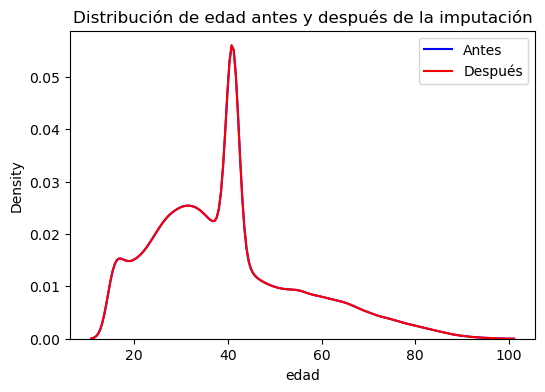

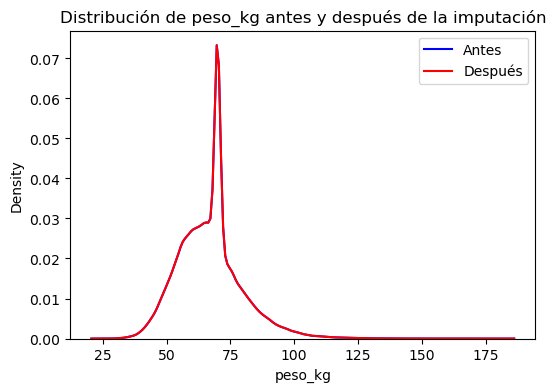

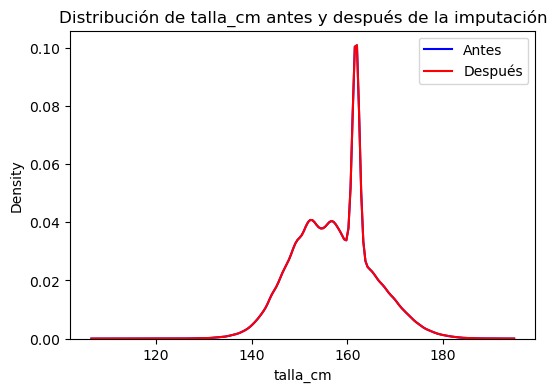

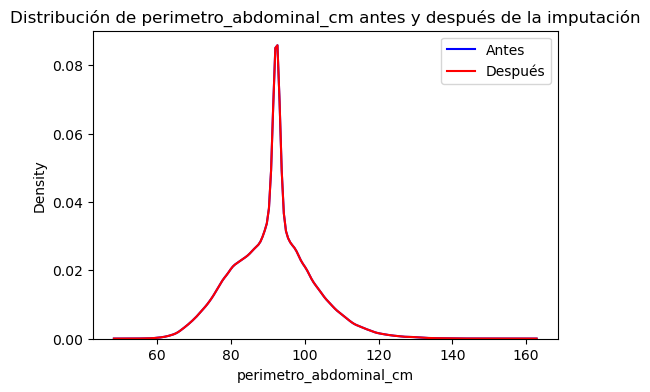

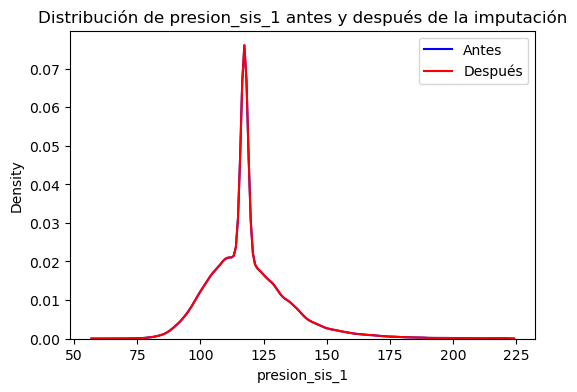

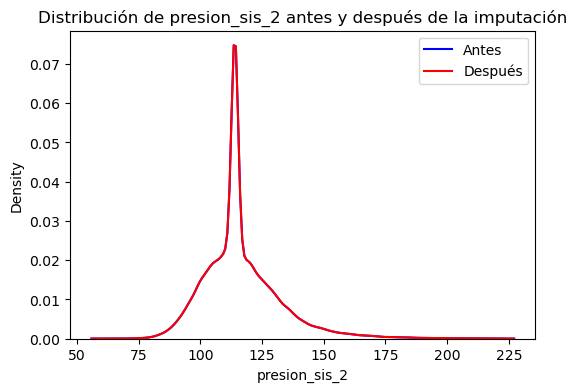

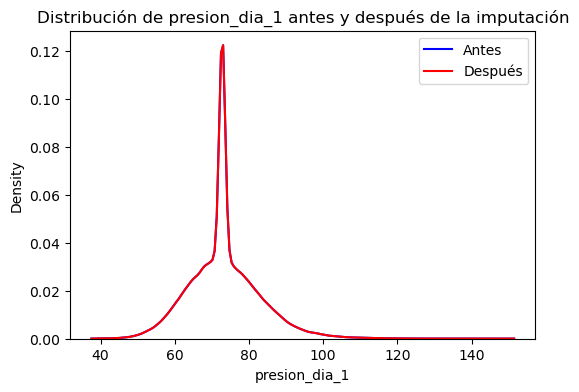

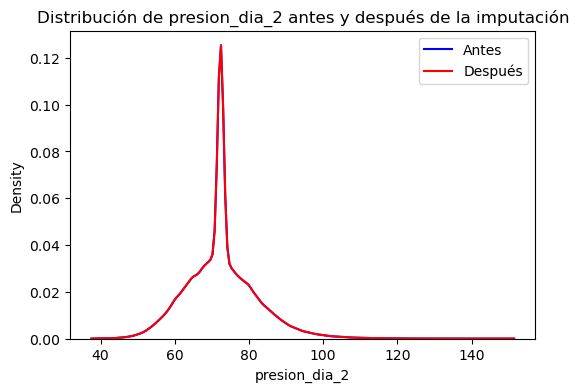

In [498]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(salud[col].dropna(), label="Antes", color="blue")
    sns.kdeplot(X[col], label="Después", color="red")
    plt.title(f"Distribución de {col} antes y después de la imputación")
    plt.legend()
    plt.show()


In [44]:
print(salud["edad"].isna().sum())
print(salud["peso_kg"].isna().sum())
print(salud["talla_cm"].isna().sum())
print(salud["perimetro_abdominal_cm"].isna().sum())
print(salud["presion_sis_1"].isna().sum())
print(salud["presion_sis_2"].isna().sum())
print(salud["presion_dia_1"].isna().sum())
print(salud["presion_dia_2"].isna().sum())

0
0
0
0
0
0
0
0


#### EXCLUSIÓN DE MENORES DE 18 AÑOS

In [32]:
#eliminar de salud los rows con edad menor a 18
salud = salud[salud["edad"] >= 18]
display(salud)

anio   id_hogar conglomerado vivienda hogar num_persona cod_resultado  \
0      2019     100201            1        2     1         2.0      completa   
1      2019     102801            1       28     1         2.0      completa   
2      2019     104801            1       48     1         2.0      completa   
3      2019     113601            1      136     1         2.0      completa   
4      2019     113701            1      137     1         2.0       ausente   
...     ...        ...          ...      ...   ...         ...           ...   
37481  2023  542903401         5429       34     1         2.0       ausente   
37482  2023  542904501         5429       45     1         2.0      completa   
37483  2023  542904701         5429       47     1         1.0      completa   
37484  2023  542904901         5429       49     1         4.0    incompleta   
37485  2023  542905001         5429       50     1         2.0      completa   

      cod_persona    sexo  edad  ...    region area_residencia  \
0               2   mujer  33.0  ...  amazonas          urbano   
1               2   mujer  36.0  ...  amazonas          urbano   
2               2   mujer  28.0  ...  amazonas          urbano   
3               2   mujer  30.0  ...  amazonas          urbano   
4                  hombre  35.0  ...  amazonas          urbano   
...           ...     ...   ...  ...       ...             ...   
37481               mujer  35.0  ...  moquegua           rural   
37482           2   mujer  56.0  ...  moquegua           rural   
37483           1  hombre  67.0  ...  moquegua           rural   
37484           4   mujer  55.0  ...  moquegua           rural   
37485           2   mujer  57.0  ...  moquegua           rural   

      lugar_residencia codigo_ubicacion_geo num_conglomerado  \
0       pequena_ciudad                10101             7065   
1       pequena_ciudad                10101             7065   
2       pequena_ciudad                10101             7065   
3       pequena_ciudad                10101             7065   
4       pequena_ciudad                10101             7065   
...                ...                  ...              ...   
37481            campo               180202          4381201   
37482            campo               180202          4381201   
37483            campo               180202          4381201   
37484            campo               180202          4381201   
37485            campo               180202          4381201   

      codigo_centro_poblado nombre_centro_poblado  longitud    latitud  \
0                         1           CHACHAPOYAS -77.87383  -6.223320   
1                         1           CHACHAPOYAS -77.87383  -6.223320   
2                         1           CHACHAPOYAS -77.87383  -6.223320   
3                         1           CHACHAPOYAS -77.87383  -6.223320   
4                         1           CHACHAPOYAS -77.87383  -6.223320   
...                     ...                   ...       ...        ...   
37481                     1               CHOJATA -70.73015 -16.388538   
37482                     1               CHOJATA -70.73015 -16.388538   
37483                     1               CHOJATA -70.73015 -16.388538   
37484                     1               CHOJATA -70.73015 -16.388538   
37485                     1               CHOJATA -70.73015 -16.388538   

      id_encuesta  
0               1  
1               2  
2               3  
3               4  
4               5  
...           ...  
37481      187868  
37482      187869  
37483      187870  
37484      187871  
37485      187872  

[178257 rows x 41 columns]

#### IMC: NCBI

In [33]:
salud["imc"] = salud["peso_kg"] / (salud["talla_cm"] / 100) ** 2

C:\Users\dial_\AppData\Local\Temp\ipykernel_16152\68706645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salud["imc"] = salud["peso_kg"] / (salud["talla_cm"] / 100) ** 2


In [38]:
#ESTÁNDARES SEGÚN NCBI
def categorizar_imc(imc):
    if imc < 18.5:
        return "Bajo peso"
    elif imc >= 18.5 and imc <= 24.9:
        return "Peso normal"
    elif imc >= 25.0 and imc <= 29.9:
        return "Sobrepeso"
    elif imc >= 30.0 and imc <= 34.9:
        return "Obesidad Clase I"
    elif imc >= 35.0 and imc <= 39.9:
        return "Obesidad Clase II"
    elif imc >= 40.0:
        return "Obesidad Clase III"
    else:
        return "Valor fuera de rango"  # Para manejar posibles errores


In [39]:
#imprime el número de valores que tiene cada categoría de imc
salud["categoria_imc"] = salud["imc"].apply(categorizar_imc)
salud["categoria_imc"].value_counts()

C:\Users\dial_\AppData\Local\Temp\ipykernel_16152\1065239050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salud["categoria_imc"] = salud["imc"].apply(categorizar_imc)


categoria_imc
Sobrepeso               91150
Peso normal             46558
Obesidad Clase I        27532
Obesidad Clase II        6830
Valor fuera de rango     2876
Obesidad Clase III       2027
Bajo peso                1284
Name: count, dtype: int64

In [40]:
#imprime el máximo y mímimo imc por categoría_imc
salud.groupby("categoria_imc")["imc"].agg(["min", "max"])

min        max
categoria_imc                             
Bajo peso             12.543326  18.499772
Obesidad Clase I      30.000000  34.899958
Obesidad Clase II     35.000000  39.896142
Obesidad Clase III    40.000000  72.886408
Peso normal           18.503240  24.899987
Sobrepeso             25.000416  29.899942
Valor fuera de rango  24.900122  39.997010

In [41]:
print(salud["imc"].describe())
display(salud)

count    178257.000000
mean         27.335725
std           4.283055
min          12.543326
25%          24.671053
50%          27.073020
75%          29.336544
max          72.886408
Name: imc, dtype: float64


anio   id_hogar conglomerado vivienda hogar num_persona cod_resultado  \
0      2019     100201            1        2     1         2.0      completa   
1      2019     102801            1       28     1         2.0      completa   
2      2019     104801            1       48     1         2.0      completa   
3      2019     113601            1      136     1         2.0      completa   
4      2019     113701            1      137     1         2.0       ausente   
...     ...        ...          ...      ...   ...         ...           ...   
37481  2023  542903401         5429       34     1         2.0       ausente   
37482  2023  542904501         5429       45     1         2.0      completa   
37483  2023  542904701         5429       47     1         1.0      completa   
37484  2023  542904901         5429       49     1         4.0    incompleta   
37485  2023  542905001         5429       50     1         2.0      completa   

      cod_persona    sexo  edad  ... lugar_residencia codigo_ubicacion_geo  \
0               2   mujer  33.0  ...   pequena_ciudad                10101   
1               2   mujer  36.0  ...   pequena_ciudad                10101   
2               2   mujer  28.0  ...   pequena_ciudad                10101   
3               2   mujer  30.0  ...   pequena_ciudad                10101   
4                  hombre  35.0  ...   pequena_ciudad                10101   
...           ...     ...   ...  ...              ...                  ...   
37481               mujer  35.0  ...            campo               180202   
37482           2   mujer  56.0  ...            campo               180202   
37483           1  hombre  67.0  ...            campo               180202   
37484           4   mujer  55.0  ...            campo               180202   
37485           2   mujer  57.0  ...            campo               180202   

      num_conglomerado codigo_centro_poblado nombre_centro_poblado  longitud  \
0                 7065                     1           CHACHAPOYAS -77.87383   
1                 7065                     1           CHACHAPOYAS -77.87383   
2                 7065                     1           CHACHAPOYAS -77.87383   
3                 7065                     1           CHACHAPOYAS -77.87383   
4                 7065                     1           CHACHAPOYAS -77.87383   
...                ...                   ...                   ...       ...   
37481          4381201                     1               CHOJATA -70.73015   
37482          4381201                     1               CHOJATA -70.73015   
37483          4381201                     1               CHOJATA -70.73015   
37484          4381201                     1               CHOJATA -70.73015   
37485          4381201                     1               CHOJATA -70.73015   

         latitud id_encuesta        imc         categoria_imc  
0      -6.223320           1  26.355556             Sobrepeso  
1      -6.223320           2  32.724838      Obesidad Clase I  
2      -6.223320           3  34.132280      Obesidad Clase I  
3      -6.223320           4  24.638117           Peso normal  
4      -6.223320           5  25.930253             Sobrepeso  
...          ...         ...        ...                   ...  
37481 -16.388538      187868  28.337130             Sobrepeso  
37482 -16.388538      187869  25.117073             Sobrepeso  
37483 -16.388538      187870  26.770831             Sobrepeso  
37484 -16.388538      187871  29.823253             Sobrepeso  
37485 -16.388538      187872  24.937539  Valor fuera de rango  

[178257 rows x 43 columns]

#### Limpieza anterior

In [26]:
# #imprime el número de valores únicos en imc con categoria peso muy inferior al normal
# print(salud[salud["categoria_imc"] == "Peso muy inferior al normal"]["imc"].nunique())

In [27]:
# # Calcular la mediana corregida para "Peso muy inferior al normal"
# filtro_valido = (salud["categoria_imc"] == "Peso muy inferior al normal") & (salud["imc"].round(6) > 10.001000)
# if filtro_valido.any():
#     mediana_corregida = salud.loc[filtro_valido, "imc"].median()
#     print(f"Mediana corregida para 'Peso muy inferior al normal': {mediana_corregida}")

# medianas_imc = salud.loc[(salud["imc"] > 10.001) & (salud["imc"] <= 100)].groupby("categoria_imc")["imc"].median()

# if "Peso muy inferior al normal" in medianas_imc.index:
#     print(f"Reemplazando mediana original {medianas_imc['Peso muy inferior al normal']} con {mediana_corregida}")
#     medianas_imc.loc["Peso muy inferior al normal"] = mediana_corregida

# def imputar_imc(row):
#     if row["categoria_imc"] == "Peso muy inferior al normal" and row["imc"] <= 10.05:
#         return mediana_corregida
#     elif row["imc"] > 100 or row["imc"] < 10.001:
#         return medianas_imc.get(row["categoria_imc"], row["imc"])
#     return row["imc"]

In [28]:
# salud["imc"] = salud.apply(imputar_imc, axis=1)
# salud["categoria_imc"] = salud["imc"].apply(categorizar_imc)

In [29]:
# print(medianas_imc)

In [30]:
# # Excluir valores incorrectos antes de calcular la mediana
# medianas_perimetro = salud[salud["perimetro_abdominal_cm"] != 999.9].groupby("categoria_imc")["perimetro_abdominal_cm"].median()
# print(medianas_perimetro)  # Verificar las medianas calculadas


In [31]:
# # Imputar los valores erróneos de 999.9 con la mediana de su categoría de IMC
# def imputar_perimetro(row):
#     if row["perimetro_abdominal_cm"] == 999.9:
#         return medianas_perimetro[row["categoria_imc"]]
#     return row["perimetro_abdominal_cm"]

# salud["perimetro_abdominal_cm"] = salud.apply(imputar_perimetro, axis=1)

In [33]:
# categoria_imc_agrupada = salud.groupby("categoria_imc").size().reset_index(name="count")

In [34]:
# # Imputar los valores NaN con la mediana correspondiente de su categoría
# for categoria, mediana in medianas_perimetro.items():
#     salud.loc[(salud["categoria_imc"] == categoria) & (salud["perimetro_abdominal_cm"].isna()), "perimetro_abdominal_cm"] = mediana

# # Verificar que ya no haya NaN en la columna
# print(salud["perimetro_abdominal_cm"].isna().sum())  # Debería imprimir 0 si todo está bien

In [35]:
# print(salud["imc"].isna().sum())
# print(salud["id_hogar"].isna().sum())

#### Gráfico de dispersión: IMC vs Perímetro abdominal

In [42]:
df_agrupado = salud[["imc", "perimetro_abdominal_cm", "categoria_imc", "id_encuesta"]].copy()

In [43]:
len(df_agrupado)

178257

In [44]:
orden_categorias = {
    "Peso muy inferior al normal": 1,
    "Bajo peso": 2,
    "Peso normal": 3,
    "Sobrepeso": 4,
    "Obesidad Clase I": 5,
    "Obesidad Clase II": 6,
    "Obesidad Clase III": 7
}

In [45]:
df_agrupado["orden"] = df_agrupado["categoria_imc"].map(orden_categorias)
df_agrupado = df_agrupado.sort_values("orden")

In [46]:
salud.groupby("categoria_imc")["perimetro_abdominal_cm"].describe()


count        mean        std   min    25%     50%  \
categoria_imc                                                               
Bajo peso              1284.0   69.495561   5.821795  52.3   66.3   69.15   
Obesidad Clase I      27532.0  101.996604   6.190892  61.6   97.9  102.00   
Obesidad Clase II      6830.0  110.976823   7.213287  69.5  106.8  111.30   
Obesidad Clase III     2027.0  121.984361  10.152552  77.2  116.3  121.90   
Peso normal           46558.0   81.721897   6.351010  51.1   77.4   81.70   
Sobrepeso             91150.0   92.316427   5.170647  60.5   88.9   92.20   
Valor fuera de rango   2876.0   93.766898   9.068002  68.8   87.3   92.40   

                        75%    max  
categoria_imc                       
Bajo peso              71.9   98.3  
Obesidad Clase I      106.1  150.2  
Obesidad Clase II     115.6  134.6  
Obesidad Clase III    128.0  160.0  
Peso normal            86.2  142.1  
Sobrepeso              95.6  128.2  
Valor fuera de rango   99.0  138.5

In [47]:
plt.figure(figsize=(12, 6))

#scatter plot con categoria imc agrupada
sns.scatterplot(data=df_agrupado, x="imc", y="perimetro_abdominal_cm", hue="categoria_imc", palette="coolwarm", alpha=0.5)

#lineas verticales de referencia para las categorías de IMC
for x in [16.5, 18.5, 25, 30, 35, 40]:
    plt.axvline(x, color='gray', linestyle='--', alpha=0.6)
    
plt.title("IMC vs Perímetro Abdominal")
plt.xlabel("IMC")
plt.ylabel("Perímetro Abdominal")
plt.legend(title="Categoría IMC", bbox_to_anchor=(1, 1))
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# plt.figure(figsize=(12, 6))
# salud_nomissing = salud.dropna(subset=["imc"])
# sns.boxplot(data=salud_nomissing[salud_nomissing["imc"]<300], x="anio", y="imc")
# # sns.violinplot(data=salud_nomissing[salud_nomissing["imc"]<300], x="anio", y="imc", hue="sexo", split=True)

# plt.title("Distribución del IMC por Año")
# plt.xlabel("Año")
# plt.ylabel("IMC")
# plt.show()

In [ ]:
# # perimetro abdominal y sexo
# plt.figure(figsize=(12, 6))
# salud_nomissing = salud.dropna(subset=["perimetro_abdominal_cm"])
# sns.boxplot(data=salud_nomissing[salud_nomissing["perimetro_abdominal_cm"]< 800], x="anio", y="perimetro_abdominal_cm")

# plt.title("Distribución del Perímetro Abdominal por Año")
# plt.xlabel("Año")
# plt.ylabel("Perímetro Abdominal")
# plt.show()

#### HIPERTENSIÓN

In [48]:
# Calcular el promedio de la presión sistólica y diastólica
salud["presion_sis_promedio"] = salud[["presion_sis_1", "presion_sis_2"]].mean(axis=1)
salud["presion_dia_promedio"] = salud[["presion_dia_1", "presion_dia_2"]].mean(axis=1)

C:\Users\dial_\AppData\Local\Temp\ipykernel_16152\2465493461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salud["presion_sis_promedio"] = salud[["presion_sis_1", "presion_sis_2"]].mean(axis=1)
C:\Users\dial_\AppData\Local\Temp\ipykernel_16152\2465493461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salud["presion_dia_promedio"] = salud[["presion_dia_1", "presion_dia_2"]].mean(axis=1)


In [49]:
len(salud["presion_dia_promedio"])

178257

In [50]:
# Definir función para categorizar la presión arterial
def categorizar_presion(sistolica, diastolica):
    if sistolica >= 180 or diastolica > 120:
        return "Crisis Hipertensiva (Hipertensión Etapa 3)"
    elif sistolica >= 140 or diastolica >= 90:
        return "Hipertensión Etapa 2"
    elif sistolica >= 130 or diastolica >= 80:
        return "Hipertensión Etapa 1"
    elif sistolica >= 120 and diastolica < 80:
        return "Elevado"
    else:
        return "Normal"

# Aplicar la categorización
salud["categoria_presion"] = salud.apply(
    lambda row: categorizar_presion(row["presion_sis_promedio"], row["presion_dia_promedio"]), axis=1
)


C:\Users\dial_\AppData\Local\Temp\ipykernel_16152\2445744125.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salud["categoria_presion"] = salud.apply(


In [51]:
print(salud["presion_sis_promedio"].describe())
print(salud["presion_dia_promedio"].describe())
print(salud["categoria_presion"].value_counts())

count    178257.000000
mean        118.707759
std          15.575636
min          62.500000
25%         109.500000
50%         117.500000
75%         125.000000
max         220.000000
Name: presion_sis_promedio, dtype: float64
count    178257.000000
mean         73.351888
std           9.157258
min          40.000000
25%          68.000000
50%          73.000000
75%          77.500000
max         149.000000
Name: presion_dia_promedio, dtype: float64
categoria_presion
Normal                                        98757
Elevado                                       33035
Hipertensión Etapa 1                          29288
Hipertensión Etapa 2                          16097
Crisis Hipertensiva (Hipertensión Etapa 3)     1080
Name: count, dtype: int64


In [52]:
#agrgar diagnostico_hipertension y categoria_presion a df_agrupado
df_agrupado["diagnostico_hipertension"] = salud["diagnostico_hipertension"].values

df_agrupado["categoria_presion"] = salud["categoria_presion"].values
display(df_agrupado)

imc  perimetro_abdominal_cm         categoria_imc  id_encuesta  \
8143   18.134830                    65.6             Bajo peso       158530   
25717  17.795675                    71.4             Bajo peso       176104   
15380  17.713052                    72.0             Bajo peso       165767   
17145  18.142938                    67.6             Bajo peso        54620   
25863  17.663738                    69.4             Bajo peso        25864   
...          ...                     ...                   ...          ...   
37358  29.939742                    94.9  Valor fuera de rango       187745   
37408  24.955713                    93.1  Valor fuera de rango       187795   
37443  34.904261                    95.3  Valor fuera de rango       187830   
37464  24.944231                    92.5  Valor fuera de rango       187851   
37485  24.937539                    92.6  Valor fuera de rango       187872   

       orden diagnostico_hipertension     categoria_presion  
8143     2.0                       no                Normal  
25717    2.0                       no                Normal  
15380    2.0                       no  Hipertensión Etapa 1  
17145    2.0                       no                Normal  
25863    2.0                       no                Normal  
...      ...                      ...                   ...  
37358    NaN                       no                Normal  
37408    NaN                       no                Normal  
37443    NaN                       si               Elevado  
37464    NaN                       no                Normal  
37485    NaN                       si               Elevado  

[178257 rows x 7 columns]

#### Histograma de promedio de presiones

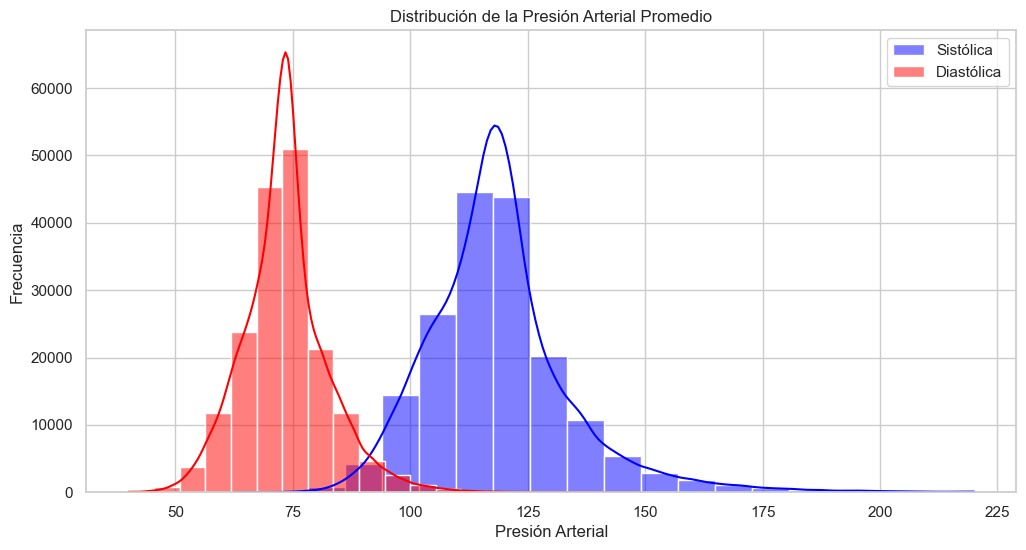

In [544]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(salud["presion_sis_promedio"], bins=20, kde=True, color="blue", label="Sistólica")
sns.histplot(salud["presion_dia_promedio"], bins=20, kde=True, color="red", label="Diastólica")
plt.title("Distribución de la Presión Arterial Promedio")
plt.xlabel("Presión Arterial")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

#### Histograma de diagnostico_hipertension

In [545]:
print(salud["diagnostico_hipertension"].unique())  

['no' 'si']


C:\Users\dial_\AppData\Local\Temp\ipykernel_14280\3811678912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=salud, x="diagnostico_hipertension", palette="viridis")


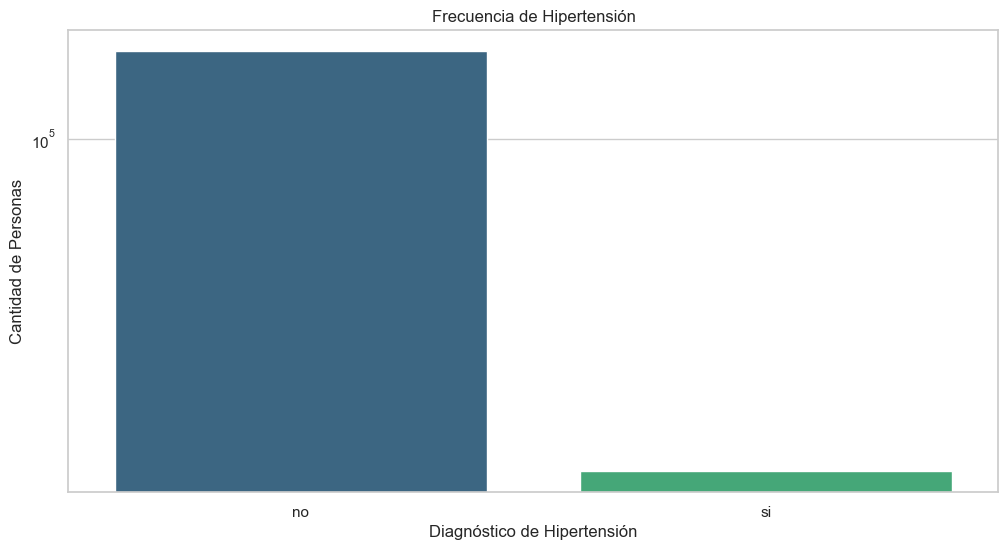

In [546]:
# Gráfico de barras: Frecuencia de hipertensión (Sí/No)
plt.figure(figsize=(12, 6))
sns.countplot(data=salud, x="diagnostico_hipertension", palette="viridis")
plt.title("Frecuencia de Hipertensión")
plt.xlabel("Diagnóstico de Hipertensión")
plt.ylabel("Cantidad de Personas")
plt.yscale("log")
plt.show()

In [233]:
print(salud.columns)

Index(['anio', 'id_hogar', 'conglomerado', 'vivienda', 'hogar', 'num_persona',
       'cod_resultado', 'cod_persona', 'sexo', 'edad', 'asistio_escuela',
       'nivel_aprobado', 'seguro_salud', 'institucion_seguro',
       'diagnostico_hipertension', 'fuma_diario', 'alcohol_30d',
       'dias_jugo_unidad', 'dias_jugo', 'fumo_30d', 'peso_kg', 'talla_cm',
       'resultado_antropometria', 'presion_sis_1', 'presion_dia_1',
       'presion_sis_2', 'presion_dia_2', 'resultado_presion',
       'perimetro_abdominal_cm', 'resultado_perimetro_abd', 'dominio',
       'region', 'area_residencia', 'lugar_residencia', 'codigo_ubicacion_geo',
       'num_conglomerado', 'codigo_centro_poblado', 'nombre_centro_poblado',
       'longitud', 'latitud', 'imc', 'categoria_imc', 'imc_original',
       'excluir', 'presion_sis_promedio', 'presion_dia_promedio',
       'categoria_presion'],
      dtype='object')


#### fuma_diario (no ingresa)

In [234]:
salud["fuma_diario"] = salud["fuma_diario"].fillna("Desconocido")
print(salud["fuma_diario"].unique())

['Desconocido' 'no' 'si']


In [235]:
print(salud["fuma_diario"].value_counts(normalize=True))

fuma_diario
Desconocido    0.919996
no             0.069394
si             0.010610
Name: proportion, dtype: float64


#### fumo_30d (no ingresa)

In [237]:
salud["fumo_30d"] = salud["fumo_30d"].fillna("Desconocido")
print(salud["fumo_30d"].unique())

['Desconocido' 'si' 'no' 'no_sabe_no_recuerda']


In [238]:
print(salud["fumo_30d"].value_counts())

fumo_30d
Desconocido            147524
si                      13784
no                      10976
no_sabe_no_recuerda         8
Name: count, dtype: int64


#### alcohol_30d (no ingresa)

In [240]:
salud["alcohol_30d"] = salud["alcohol_30d"].fillna("Desconocido")
print(salud["alcohol_30d"].unique())

['Desconocido' 'si' 'no' 'no_sabe_no_recuerda']


In [241]:
print(salud["alcohol_30d"].value_counts(normalize=True))

alcohol_30d
Desconocido            0.401475
no                     0.321623
si                     0.276798
no_sabe_no_recuerda    0.000104
Name: proportion, dtype: float64


In [547]:
# número de valores faltants por columna en salud
print(salud.isna().sum())


anio                             0
id_hogar                         0
conglomerado                     0
vivienda                         0
hogar                            0
num_persona                      0
cod_resultado                15546
cod_persona                      0
sexo                             0
edad                             0
asistio_escuela              25204
nivel_aprobado               31583
seguro_salud                 25204
institucion_seguro               0
diagnostico_hipertension         0
fuma_diario                 164662
alcohol_30d                  79146
dias_jugo_unidad             25213
dias_jugo                        0
fumo_30d                    153992
peso_kg                          0
talla_cm                         0
resultado_antropometria      31639
presion_sis_1                    0
presion_dia_1                    0
presion_sis_2                    0
presion_dia_2                    0
resultado_presion            33402
perimetro_abdominal_

In [53]:
# descargar el archivo salud
salud.to_csv("salud.csv", index=False)

## Instrucción

### asistio_escuela

In [244]:
salud['asistio_escuela'] = salud['asistio_escuela'].fillna("Desconocido")
print(salud['asistio_escuela'].unique())

['si' 'Desconocido' 'no']


In [245]:
print(salud['asistio_escuela'].value_counts(normalize=True))

asistio_escuela
si             0.906879
Desconocido    0.056056
no             0.037065
Name: proportion, dtype: float64


### nivel_aprobado

In [246]:
salud["nivel_aprobado"] = salud["nivel_aprobado"].fillna("Desconocido")
print(salud["nivel_aprobado"].unique())

['superior_universitaria' 'superior_no_universitaria' 'primaria'
 'Desconocido' 'secundaria' 'postgrado' 'inicial_preescolar']


In [247]:
print(salud["nivel_aprobado"].value_counts(normalize=True))

nivel_aprobado
secundaria                   0.426619
primaria                     0.211159
superior_no_universitaria    0.139356
superior_universitaria       0.116343
Desconocido                  0.093138
postgrado                    0.011637
inicial_preescolar           0.001747
Name: proportion, dtype: float64


In [248]:
#calcular el promedio de los valores de nivel_aprobado

## VARIABLES

### Data educación

In [249]:
# categoria_nivel_dominio = salud.groupby(['dominio', 'anio', 'nivel_aprobado']).agg(
#     cantidad_personas=('id_hogar', 'count'),
# ).reset_index()

total_personas = salud.groupby(["dominio", "anio"]).agg(
    total_encuestados=("id_hogar", "count")
).reset_index()

In [250]:
# display(categoria_nivel_dominio)

In [251]:
# df_final_nivel = categoria_nivel_dominio.merge(total_personas, on=["dominio", "anio"], how="left")
# df_final_nivel["porcentaje_nivel"] = df_final_nivel["cantidad_personas"] / df_final_nivel["total_encuestados"] * 100

# display(df_final_nivel)

In [252]:
categoria_educacion_dominio = salud.groupby(['dominio', 'anio', 'asistio_escuela']).agg(
    cantidad_personas=('id_hogar', 'count')
    ).reset_index()

In [253]:
df_educacion = categoria_educacion_dominio[categoria_educacion_dominio["asistio_escuela"] == "si"].copy()
display(df_educacion)

dominio  anio asistio_escuela  cantidad_personas
2    amazonas  2019              si               1284
5    amazonas  2020              si               1308
8    amazonas  2021              si               1288
11   amazonas  2022              si               1279
14   amazonas  2023              si               1270
..        ...   ...             ...                ...
362   ucayali  2019              si               1196
365   ucayali  2020              si               1196
368   ucayali  2021              si               1194
371   ucayali  2022              si               1205
374   ucayali  2023              si               1199

[125 rows x 4 columns]

### Data Obesidad

In [254]:
categoria_imc_dominio = salud.groupby(["dominio", "anio", "categoria_imc"]).agg(
    cantidad_personas=("id_hogar", "count"),
    imc_promedio=("imc", "mean"),  # Promedio de IMC
    perimetro_abdominal_promedio=("perimetro_abdominal_cm", "mean")  # Promedio de perimetro
).reset_index()

In [255]:
df_obesidad = categoria_imc_dominio[categoria_imc_dominio['categoria_imc'].str.contains("Obesidad")].copy()
display(df_obesidad)

dominio  anio       categoria_imc  cantidad_personas  imc_promedio  \
1    amazonas  2019    Obesidad Clase I                159     32.033522   
2    amazonas  2019   Obesidad Clase II                 29     37.068207   
3    amazonas  2019  Obesidad Clase III                 62     42.075228   
8    amazonas  2020    Obesidad Clase I                118     32.065210   
9    amazonas  2020   Obesidad Clase II                 29     36.621301   
..        ...   ...                 ...                ...           ...   
863   ucayali  2022   Obesidad Clase II                 67     37.060818   
864   ucayali  2022  Obesidad Clase III                 33     43.940564   
869   ucayali  2023    Obesidad Clase I                223     31.913731   
870   ucayali  2023   Obesidad Clase II                 60     36.922670   
871   ucayali  2023  Obesidad Clase III                 27     43.859558   

     perimetro_abdominal_promedio  
1                      103.235220  
2                      111.341379  
3                      121.604839  
8                      103.172034  
9                      111.227586  
..                            ...  
863                    109.871642  
864                    118.872727  
869                     98.578475  
870                    108.001667  
871                    122.151852  

[375 rows x 6 columns]

In [256]:
df_final_obe = df_obesidad.merge(total_personas, on=["dominio", "anio"], how="left")
df_final_obe["porcentaje_obesidad"] = (df_final_obe["cantidad_personas"] / df_final_obe["total_encuestados"]) * 100

df_final_obe = df_final_obe[
    ["dominio", "anio", "categoria_imc", "cantidad_personas", 
     "total_encuestados", "porcentaje_obesidad", 
     "imc_promedio", "perimetro_abdominal_promedio"]
]
display(df_final_obe)


dominio  anio       categoria_imc  cantidad_personas  total_encuestados  \
0    amazonas  2019    Obesidad Clase I                159               1409   
1    amazonas  2019   Obesidad Clase II                 29               1409   
2    amazonas  2019  Obesidad Clase III                 62               1409   
3    amazonas  2020    Obesidad Clase I                118               1427   
4    amazonas  2020   Obesidad Clase II                 29               1427   
..        ...   ...                 ...                ...                ...   
370   ucayali  2022   Obesidad Clase II                 67               1247   
371   ucayali  2022  Obesidad Clase III                 33               1247   
372   ucayali  2023    Obesidad Clase I                223               1242   
373   ucayali  2023   Obesidad Clase II                 60               1242   
374   ucayali  2023  Obesidad Clase III                 27               1242   

     porcentaje_obesidad  imc_promedio  perimetro_abdominal_promedio  
0              11.284599     32.033522                    103.235220  
1               2.058197     37.068207                    111.341379  
2               4.400284     42.075228                    121.604839  
3               8.269096     32.065210                    103.172034  
4               2.032235     36.621301                    111.227586  
..                   ...           ...                           ...  
370             5.372895     37.060818                    109.871642  
371             2.646351     43.940564                    118.872727  
372            17.954911     31.913731                     98.578475  
373             4.830918     36.922670                    108.001667  
374             2.173913     43.859558                    122.151852  

[375 rows x 8 columns]

In [257]:
# Filtrar solo las categorías de obesidad
df_obesidad_filtered = df_final_obe[df_final_obe["categoria_imc"].str.contains("Obesidad")]

# Agrupar por dominio y año y calcular los promedios
df_obesidad_resumen = df_obesidad_filtered.groupby(["dominio", "anio"]).agg(
    cantidad_personas=("cantidad_personas", "sum"),
    total_encuestados=("total_encuestados", "first"),  
    porcentaje_obesidad=("porcentaje_obesidad", "mean"),
    imc_promedio=("imc_promedio", "mean"),
    perimetro_abdominal_promedio=("perimetro_abdominal_promedio", "mean")
).reset_index()

display(df_obesidad_resumen)


dominio  anio  cantidad_personas  total_encuestados  \
0    amazonas  2019                250               1409   
1    amazonas  2020                647               1427   
2    amazonas  2021                284               1387   
3    amazonas  2022                263               1391   
4    amazonas  2023                267               1393   
..        ...   ...                ...                ...   
120   ucayali  2019                312               1245   
121   ucayali  2020                558               1236   
122   ucayali  2021                330               1240   
123   ucayali  2022                337               1247   
124   ucayali  2023                310               1242   

     porcentaje_obesidad  imc_promedio  perimetro_abdominal_promedio  
0               5.914360     37.058985                    112.060479  
1              15.113291     36.720748                    112.157273  
2               6.825282     36.858170                    111.224641  
3               6.302420     37.340276                    111.999617  
4               6.389088     36.659762                    111.234350  
..                   ...           ...                           ...  
120             8.353414     37.332667                    111.686412  
121            15.048544     37.178873                    110.246673  
122             8.870968     37.469910                    110.025333  
123             9.008287     37.615913                    109.640387  
124             8.319914     37.565320                    109.577331  

[125 rows x 7 columns]

### Data Hipertensión

In [258]:
categoria_hipertension_dominio = salud.groupby(["dominio", "anio", "categoria_presion"]).agg(
    cantidad_personas=("id_hogar", "count"),
    presion_sistolica_promedio=("presion_sis_promedio", "mean"),
    presion_diastolica_promedio=("presion_dia_promedio", "mean")
).reset_index()

In [259]:
df_hipertension = categoria_hipertension_dominio[categoria_hipertension_dominio['categoria_presion'].str.contains("Hipertensión")].copy()
# display(df_hipertension)

In [260]:
df_final_hip = df_hipertension.merge(total_personas, on=["dominio", "anio"], how="left")
df_final_hip["porcentaje_hipertension"] = (df_final_hip["cantidad_personas"] / df_final_hip["total_encuestados"]) * 100

df_final_hip = df_final_hip[
    ["dominio", "anio", "categoria_presion", "cantidad_personas", 
     "total_encuestados", "porcentaje_hipertension", 
     "presion_sistolica_promedio", "presion_diastolica_promedio"]
]

display(df_final_hip)

dominio  anio                           categoria_presion  \
0    amazonas  2019  Crisis Hipertensiva (Hipertensión Etapa 3)   
1    amazonas  2019                        Hipertensión Etapa 1   
2    amazonas  2019                        Hipertensión Etapa 2   
3    amazonas  2020  Crisis Hipertensiva (Hipertensión Etapa 3)   
4    amazonas  2020                        Hipertensión Etapa 1   
..        ...   ...                                         ...   
370   ucayali  2022                        Hipertensión Etapa 1   
371   ucayali  2022                        Hipertensión Etapa 2   
372   ucayali  2023  Crisis Hipertensiva (Hipertensión Etapa 3)   
373   ucayali  2023                        Hipertensión Etapa 1   
374   ucayali  2023                        Hipertensión Etapa 2   

     cantidad_personas  total_encuestados  porcentaje_hipertension  \
0                   19               1409                 1.348474   
1                  239               1409                16.962385   
2                  152               1409                10.787793   
3                   78               1427                 5.466013   
4                  144               1427                10.091100   
..                 ...                ...                      ...   
370                213               1247                17.080994   
371                 51               1247                 4.089816   
372                  1               1242                 0.080515   
373                215               1242                17.310789   
374                 51               1242                 4.106280   

     presion_sistolica_promedio  presion_diastolica_promedio  
0                    192.131579                    89.960526  
1                    130.100418                    78.939331  
2                    150.299342                    82.503289  
3                    191.621795                    95.439103  
4                    130.847222                    79.670139  
..                          ...                          ...  
370                  125.969484                    80.183099  
371                  150.843137                    89.529412  
372                  190.500000                   117.000000  
373                  125.969767                    80.676744  
374                  149.215686                    89.137255  

[375 rows x 8 columns]

In [261]:
#filtrar sobre las categorías de hipertensión
df_hipertension_filtered = df_final_hip[df_final_hip["categoria_presion"].str.contains("Hipertensión")]

#agrupar por dominio y año
df_hipertension_resumen = df_hipertension_filtered.groupby(["dominio", "anio"]).agg(
    cantidad_personas=("cantidad_personas", "sum"),
    total_encuestados=("total_encuestados", "first"),
    porcentaje_hipertension=("porcentaje_hipertension", "mean"),
    presion_sistolica_promedio=("presion_sistolica_promedio", "mean"),
    presion_diastolica_promedio=("presion_diastolica_promedio", "mean")
).reset_index()

display(df_hipertension_resumen)

dominio  anio  cantidad_personas  total_encuestados  \
0    amazonas  2019                410               1409   
1    amazonas  2020                306               1427   
2    amazonas  2021                428               1387   
3    amazonas  2022                406               1391   
4    amazonas  2023                349               1393   
..        ...   ...                ...                ...   
120   ucayali  2019                222               1245   
121   ucayali  2020                201               1236   
122   ucayali  2021                255               1240   
123   ucayali  2022                266               1247   
124   ucayali  2023                267               1242   

     porcentaje_hipertension  presion_sistolica_promedio  \
0                   9.699551                  157.510446   
1                   7.147863                  158.241656   
2                  10.285989                  157.361029   
3                   9.729212                  155.751342   
4                   8.351280                  155.956175   
..                       ...                         ...   
120                 5.943775                  162.360545   
121                 5.420712                  157.561203   
122                 6.854839                  155.437373   
123                 7.110398                  157.020874   
124                 7.165862                  155.228485   

     presion_diastolica_promedio  
0                      83.801049  
1                      84.796334  
2                      86.815328  
3                      91.923674  
4                      91.599000  
..                           ...  
120                    80.127854  
121                    85.124448  
122                    87.705329  
123                    89.529170  
124                    95.604666  

[125 rows x 7 columns]

### Data unión

In [262]:
categoria_union_dominio = salud.groupby(["dominio", "anio","categoria_imc", "categoria_presion"]).agg(
    cantidad_personas=("id_hogar", "count"),
    
    presion_sistolica_promedio=("presion_sis_promedio", "mean"),
    presion_diastolica_promedio=("presion_dia_promedio", "mean"),
    imc_promedio=("imc", "mean"),  # Promedio de IMC
    perimetro_abdominal_promedio=("perimetro_abdominal_cm", "mean")  # Promedio de perimetro
).reset_index()

In [263]:
df_union = categoria_union_dominio[
    (categoria_union_dominio['categoria_imc'].str.contains("Obesidad", na=False)) &
    (categoria_union_dominio['categoria_presion'].str.contains("Hipertensión", na=False))
].copy()
display(df_union)

dominio  anio       categoria_imc  \
3     amazonas  2019    Obesidad Clase I   
5     amazonas  2019    Obesidad Clase I   
6     amazonas  2019    Obesidad Clase I   
9     amazonas  2019   Obesidad Clase II   
10    amazonas  2019   Obesidad Clase II   
...        ...   ...                 ...   
3620   ucayali  2023    Obesidad Clase I   
3623   ucayali  2023   Obesidad Clase II   
3624   ucayali  2023   Obesidad Clase II   
3626   ucayali  2023  Obesidad Clase III   
3627   ucayali  2023  Obesidad Clase III   

                               categoria_presion  cantidad_personas  \
3     Crisis Hipertensiva (Hipertensión Etapa 3)                  2   
5                           Hipertensión Etapa 1                 46   
6                           Hipertensión Etapa 2                 16   
9                           Hipertensión Etapa 1                  8   
10                          Hipertensión Etapa 2                  6   
...                                          ...                ...   
3620                        Hipertensión Etapa 2                 13   
3623                        Hipertensión Etapa 1                 20   
3624                        Hipertensión Etapa 2                  7   
3626                        Hipertensión Etapa 1                  6   
3627                        Hipertensión Etapa 2                  4   

      presion_sistolica_promedio  presion_diastolica_promedio  imc_promedio  \
3                     192.250000                   108.750000     31.996577   
5                     128.858696                    79.684783     32.151868   
6                     151.406250                    84.625000     32.433080   
9                     130.812500                    80.625000     36.748721   
10                    151.666667                    81.750000     36.388453   
...                          ...                          ...           ...   
3620                  156.884615                    94.423077     31.360646   
3623                  128.150000                    81.425000     37.083440   
3624                  149.357143                    94.642857     36.634580   
3626                  124.166667                    82.083333     43.361875   
3627                  153.875000                    90.125000     45.171473   

      perimetro_abdominal_promedio  
3                       104.700000  
5                       103.582609  
6                       106.056250  
9                       113.187500  
10                      113.550000  
...                            ...  
3620                    100.600000  
3623                    108.650000  
3624                    111.171429  
3626                    116.050000  
3627                    133.325000  

[900 rows x 9 columns]

In [264]:
df_final_union = df_union.merge(total_personas, on=["dominio", "anio"], how="left")

df_final_union["porcentaje_obesidad_hipertension"] = (df_final_union["cantidad_personas"] / df_final_union["total_encuestados"]) * 100


df_final_union = df_final_union[
    ["dominio", "anio", "categoria_imc","categoria_presion", "cantidad_personas", 
     "total_encuestados",  "porcentaje_obesidad_hipertension", 
     "imc_promedio", "perimetro_abdominal_promedio", 
     "presion_sistolica_promedio", "presion_diastolica_promedio"]
]

display(df_final_union)

dominio  anio       categoria_imc  \
0    amazonas  2019    Obesidad Clase I   
1    amazonas  2019    Obesidad Clase I   
2    amazonas  2019    Obesidad Clase I   
3    amazonas  2019   Obesidad Clase II   
4    amazonas  2019   Obesidad Clase II   
..        ...   ...                 ...   
895   ucayali  2023    Obesidad Clase I   
896   ucayali  2023   Obesidad Clase II   
897   ucayali  2023   Obesidad Clase II   
898   ucayali  2023  Obesidad Clase III   
899   ucayali  2023  Obesidad Clase III   

                              categoria_presion  cantidad_personas  \
0    Crisis Hipertensiva (Hipertensión Etapa 3)                  2   
1                          Hipertensión Etapa 1                 46   
2                          Hipertensión Etapa 2                 16   
3                          Hipertensión Etapa 1                  8   
4                          Hipertensión Etapa 2                  6   
..                                          ...                ...   
895                        Hipertensión Etapa 2                 13   
896                        Hipertensión Etapa 1                 20   
897                        Hipertensión Etapa 2                  7   
898                        Hipertensión Etapa 1                  6   
899                        Hipertensión Etapa 2                  4   

     total_encuestados  porcentaje_obesidad_hipertension  imc_promedio  \
0                 1409                          0.141945     31.996577   
1                 1409                          3.264727     32.151868   
2                 1409                          1.135557     32.433080   
3                 1409                          0.567779     36.748721   
4                 1409                          0.425834     36.388453   
..                 ...                               ...           ...   
895               1242                          1.046699     31.360646   
896               1242                          1.610306     37.083440   
897               1242                          0.563607     36.634580   
898               1242                          0.483092     43.361875   
899               1242                          0.322061     45.171473   

     perimetro_abdominal_promedio  presion_sistolica_promedio  \
0                      104.700000                  192.250000   
1                      103.582609                  128.858696   
2                      106.056250                  151.406250   
3                      113.187500                  130.812500   
4                      113.550000                  151.666667   
..                            ...                         ...   
895                    100.600000                  156.884615   
896                    108.650000                  128.150000   
897                    111.171429                  149.357143   
898                    116.050000                  124.166667   
899                    133.325000                  153.875000   

     presion_diastolica_promedio  
0                     108.750000  
1                      79.684783  
2                      84.625000  
3                      80.625000  
4                      81.750000  
..                           ...  
895                    94.423077  
896                    81.425000  
897                    94.642857  
898                    82.083333  
899                    90.125000  

[900 rows x 11 columns]

In [265]:
#filtrar sobre las categorías de union
df_union_filtered = df_final_union[
    (df_final_union['categoria_imc'].str.contains("Obesidad", na=False)) &
    (df_final_union['categoria_presion'].str.contains("Hipertensión", na=False))
].copy()

#agrupar por dominio y año
df_union_resumen = df_union_filtered.groupby(["dominio", "anio"]).agg(
    cantidad_personas=("cantidad_personas", "sum"),
    total_encuestados=("total_encuestados", "first"),
    imc_promedio=("imc_promedio", "mean"),
    perimetro_abdominal_promedio=("perimetro_abdominal_promedio", "mean"),
    presion_sistolica_promedio=("presion_sistolica_promedio", "mean"),
    presion_diastolica_promedio=("presion_diastolica_promedio", "mean"),
    porcentaje_obesidad_hipertension=("porcentaje_obesidad_hipertension", "mean")
).reset_index()

display(df_union_resumen)

dominio  anio  cantidad_personas  total_encuestados  imc_promedio  \
0    amazonas  2019                 82               1409     36.299653   
1    amazonas  2020                 57               1427     34.450170   
2    amazonas  2021                110               1387     36.241030   
3    amazonas  2022                 88               1391     35.617623   
4    amazonas  2023                 83               1393     36.446143   
..        ...   ...                ...                ...           ...   
120   ucayali  2019                 76               1245     36.818005   
121   ucayali  2020                 64               1236     37.338999   
122   ucayali  2021                 89               1240     37.168640   
123   ucayali  2022                 93               1247     37.140156   
124   ucayali  2023                114               1242     36.823178   

     perimetro_abdominal_promedio  presion_sistolica_promedio  \
0                      110.810908                  145.106302   
1                      108.845723                  155.441248   
2                      110.263998                  145.390929   
3                      111.187079                  146.908670   
4                      111.254356                  144.692232   
..                            ...                         ...   
120                    110.384082                  147.582080   
121                    111.282568                  139.781916   
122                    111.665303                  153.823227   
123                    108.078224                  138.328776   
124                    109.194274                  147.080058   

     presion_diastolica_promedio  porcentaje_obesidad_hipertension  
0                      86.776398                          0.831390  
1                      88.562390                          0.665732  
2                      87.357560                          1.132969  
3                      92.647096                          1.054397  
4                      88.854048                          0.851195  
..                           ...                               ...  
120                    80.749969                          0.872060  
121                    80.613311                          0.862999  
122                    90.564874                          0.797491  
123                    88.171618                          1.242983  
124                    91.479714                          1.311249  

[125 rows x 9 columns]

### Data departamentos

In [266]:
import geopandas as gpd
import fiona
import os
import fiona
print(fiona.__version__)
print(dir(fiona))

1.10.1
['BytesCollection', 'Collection', 'Env', 'ExitStack', 'FIELD_TYPES_MAP', 'Feature', 'FionaDeprecationWarning', 'Geometry', 'MemoryFile', 'NAMED_FIELD_TYPES', 'Path', 'Properties', '_ParsedPath', '_UnparsedPath', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__gdal_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_bounds', '_env', '_err', '_geometry', '_listdir', '_listlayers', '_opener_registration', '_parse_path', '_path', '_remove', '_remove_layer', '_show_versions', '_vsi_path', '_vsiopener', '_whl_dir', 'bounds', 'calc_gdal_version_num', 'collection', 'compat', 'crs', 'driver_count', 'drivers', 'drvsupport', 'ensure_env_with_credentials', 'enums', 'env', 'errors', 'gdal_version', 'get_gdal_release_name', 'get_gdal_version_num', 'get_gdal_version_tuple', 'glob', 'io', 'listdir', 'listlayers', 'log', 'logging', 'logutils', 'meta', 'model', 'ogrext', 'open', 'os', 'p', 'platform', 'prop_type', 'prop_width', 'remove'

In [267]:
shapefile_path = r"..\Departamental INEI 2023 geogpsperu SuyoPomalia\Departamental INEI 2023 geogpsperu SuyoPomalia.shp"
departamentos = gpd.read_file(shapefile_path)

departamentos_plus = pd.read_csv(r"..\regional_df.csv")

# Quitar tildes de region_provincia_distrito
departamentos_plus["region_provincia_distrito"] = departamentos_plus["region_provincia_distrito"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

print(departamentos.head(1))
display(departamentos_plus.head())

departamentos = departamentos.merge(departamentos_plus, how="left", left_on="DEPARTAMEN", right_on="region_provincia_distrito")
print(departamentos.head(1))

  CCDD DEPARTAMEN  OBJECTID  ESRI_OID  \
0   01   AMAZONAS       1.0       1.0   

                                            geometry  
0  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...  


ubigeo region_provincia_distrito  poblacion_total_2007  \
0  150000                      LIMA               8730820   
1   10000                  AMAZONAS                406087   
2   60000                 CAJAMARCA               1476708   
3  130000               LA LIBERTAD               1682213   
4  140000                LAMBAYEQUE               1174519   

   poblacion_total_2017  poblacion_total_2020  poblacion_menores_uno_2017  \
0              10135009              11261067                      137218   
1                417365                472993                        8043   
2               1427527               1603521                       24296   
3               1888972               2054619                       32610   
4               1244821               1393148                       20923   

   poblacion_mayores_80_2020  poblacion_discapacidad_2020  superficie_km2  \
0                     217672                        88625        34823.52   
1                       7743                         7826        39249.13   
2                      34202                        14891        33304.32   
3                      38674                        12707        25495.42   
4                      26935                         8254        14461.52   

   densidad_2020  ... indice_desarrollo_humano_2019  \
0     323.375322  ...                      0.707336   
1      12.051044  ...                      0.417736   
2      48.147538  ...                      0.425118   
3      80.587768  ...                      0.548224   
4      96.334825  ...                      0.534252   

   porcentaje_poblacion_pobreza_total  numero_habitantes_pobreza_total  \
0                               26.25                     2.956030e+06   
1                               32.95                     1.558512e+05   
2                               43.65                     6.999369e+05   
3                               32.95                     6.769970e+05   
4                               17.30                     2.410146e+05   

   porcentaje_poblacion_pobreza_extrema  numero_habitantes_pobreza_extrema  \
0                                  3.05                        343462.5435   
1                                  7.30                         34528.4890   
2                                 12.95                        207655.9695   
3                                  7.30                        149987.1870   
4                                  0.55                          7662.3140   

  poblacion_ocupada_2007  poblacion_ocupada_2017  \
0                3625326            4.873073e+06   
1                 124320            1.427014e+05   
2                 439480            4.943605e+05   
3                 567300            7.372602e+05   
4                 377864            4.792206e+05   

   devengado_per_capita_actividad_2020  devengado_per_capita_inversion_2020  \
0                          6923.735936                           488.735054   
1                          3919.830013                          1561.378837   
2                          3413.331404                           774.510604   
3                          2516.544411                           655.059079   
4                          2541.591065                           443.446746   

   devengado_per_capita_total_2020  
0                      7412.470989  
1                      5481.208850  
2                      4187.842009  
3                      3171.603489  
4                      2985.037811  

[5 rows x 39 columns]

  CCDD DEPARTAMEN  OBJECTID  ESRI_OID  \
0   01   AMAZONAS       1.0       1.0   

                                            geometry  ubigeo  \
0  POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...   10000   

  region_provincia_distrito  poblacion_total_2007  poblacion_total_2017  \
0                  AMAZONAS                406087                417365   

   poblacion_total_2020  ...  indice_desarrollo_humano_2019  \
0                472993  ...                       0.417736   

   porcentaje_poblacion_pobreza_total  numero_habitantes_pobreza_total  \
0                               32.95                      155851.1935   

   porcentaje_poblacion_pobreza_extrema  numero_habitantes_pobreza_extrema  \
0                                   7.3                          34528.489   

  poblacion_ocupada_2007  poblacion_ocupada_2017  \
0                 124320           142701.360234   

   devengado_per_capita_actividad_2020  devengado_per_capita_inversion_2020  \
0                   

In [268]:
#agrupar por anio  dominio
dd_departamentos = salud.groupby(["anio", "dominio"]).agg({"id_hogar": "count"}).reset_index()

print("Nombre en dd_departamentos:", dd_departamentos["dominio"].unique())

Nombre en dd_departamentos: ['amazonas' 'ancash' 'apurimac' 'arequipa' 'ayacucho' 'cajamarca' 'callao'
 'cusco' 'huancavelica' 'huanuco' 'ica' 'junin' 'la_libertad' 'lambayeque'
 'lima' 'loreto' 'madre_de_dios' 'moquegua' 'pasco' 'piura' 'puno'
 'san_martin' 'tacna' 'tumbes' 'ucayali']


In [269]:
dd_departamentos["dominio"] = dd_departamentos["dominio"].str.upper().str.replace("_", " ")


# Verificar que los cambios se aplicaron correctamente
print("Nombres después del reemplazo:")
print(sorted(dd_departamentos["dominio"].unique()))

Nombres después del reemplazo:
['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO', 'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO', 'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI']


In [270]:
print("Valores únicos en DEPARTAMEN:")
print(departamentos["DEPARTAMEN"].unique())

print("Valores únicos en dominio:")
print(dd_departamentos["dominio"].unique())


Valores únicos en DEPARTAMEN:
['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO'
 'SAN MARTIN' 'TACNA' 'TUMBES' 'UCAYALI']
Valores únicos en dominio:
['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO'
 'SAN MARTIN' 'TACNA' 'TUMBES' 'UCAYALI']


In [271]:
departamentos = departamentos.merge(dd_departamentos, left_on='DEPARTAMEN', right_on='dominio')
departamentos.drop(columns=['dominio'], inplace=True)
# display(departamentos)

In [272]:
# Revisar los nombres de departamentos en ambos DataFrames
print("Nombre en departamentos:", departamentos["DEPARTAMEN"].unique())

Nombre en departamentos: ['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO'
 'SAN MARTIN' 'TACNA' 'TUMBES' 'UCAYALI']


### Merge con df_obesidad resumen

In [273]:
mapeo_nombres = {
    "la_libertad": "LA LIBERTAD",
    "madre_de_dios": "MADRE DE DIOS",
    "san_martin": "SAN MARTIN"
}

# Paso 2: Transformar los nombres en df_obesidad_resumen antes de hacer el merge
df_obesidad_resumen["dominio"] = df_obesidad_resumen["dominio"].replace(mapeo_nombres)
df_obesidad_resumen["dominio"] = df_obesidad_resumen["dominio"].str.upper()



In [274]:
# Unir con la población total de cada departamento en 2020 asegurando que no haya duplicados
porcentaje_obesidad_anio = df_obesidad_resumen.merge(departamentos[["DEPARTAMEN", "poblacion_total_2020"]].drop_duplicates(), left_on="dominio", right_on="DEPARTAMEN", how="left")

#calcular la tasa de obesidad por cada 100k habitantes
porcentaje_obesidad_anio["tasa_obesidad_por_100k"] = (porcentaje_obesidad_anio["cantidad_personas"] / porcentaje_obesidad_anio["poblacion_total_2020"]) * 100000

#eliminar columnas innecesarias después del merge
porcentaje_obesidad_anio.drop(columns=["DEPARTAMEN"], inplace=True)

#mostrar resultados únicos por departamento y año
porcentaje_obesidad_anio = porcentaje_obesidad_anio.drop_duplicates(subset=["dominio", "anio"])
display(porcentaje_obesidad_anio)

dominio  anio  cantidad_personas  total_encuestados  \
0    AMAZONAS  2019                250               1409   
1    AMAZONAS  2020                647               1427   
2    AMAZONAS  2021                284               1387   
3    AMAZONAS  2022                263               1391   
4    AMAZONAS  2023                267               1393   
..        ...   ...                ...                ...   
120   UCAYALI  2019                312               1245   
121   UCAYALI  2020                558               1236   
122   UCAYALI  2021                330               1240   
123   UCAYALI  2022                337               1247   
124   UCAYALI  2023                310               1242   

     porcentaje_obesidad  imc_promedio  perimetro_abdominal_promedio  \
0               5.914360     37.058985                    112.060479   
1              15.113291     36.720748                    112.157273   
2               6.825282     36.858170                    111.224641   
3               6.302420     37.340276                    111.999617   
4               6.389088     36.659762                    111.234350   
..                   ...           ...                           ...   
120             8.353414     37.332667                    111.686412   
121            15.048544     37.178873                    110.246673   
122             8.870968     37.469910                    110.025333   
123             9.008287     37.615913                    109.640387   
124             8.319914     37.565320                    109.577331   

     poblacion_total_2020  tasa_obesidad_por_100k  
0                  472993               52.854905  
1                  472993              136.788494  
2                  472993               60.043172  
3                  472993               55.603360  
4                  472993               56.449038  
..                    ...                     ...  
120                632861               49.299925  
121                632861               88.171020  
122                632861               52.144152  
123                632861               53.250240  
124                632861               48.983900  

[125 rows x 9 columns]

In [275]:
print(df_obesidad_resumen["dominio"].unique())  # Ver qué valores tiene la columna
print("MOQUEGUA" in df_obesidad_resumen["dominio"].values)  # Verificar si existe

['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO'
 'SAN MARTIN' 'TACNA' 'TUMBES' 'UCAYALI']
True


In [276]:
df_obesidad_resumen["dominio"] = df_obesidad_resumen["dominio"].str.strip()
departamentos["DEPARTAMEN"] = departamentos["DEPARTAMEN"].str.strip()

print(df_obesidad_resumen["dominio"].dtype)
print(departamentos["DEPARTAMEN"].dtype)

object
object


In [277]:
departamentos_mapa = departamentos.merge(porcentaje_obesidad_anio, left_on=["DEPARTAMEN", "anio"], right_on=["dominio", "anio"], how="left")

In [278]:
print(departamentos["DEPARTAMEN"].unique())  # Ver lista de departamentos en el mapa
print("MOQUEGUA" in departamentos["DEPARTAMEN"].values)  # Ver si está incluido

['AMAZONAS' 'ANCASH' 'APURIMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CALLAO'
 'CUSCO' 'HUANCAVELICA' 'HUANUCO' 'ICA' 'JUNIN' 'LA LIBERTAD' 'LAMBAYEQUE'
 'LIMA' 'LORETO' 'MADRE DE DIOS' 'MOQUEGUA' 'PASCO' 'PIURA' 'PUNO'
 'SAN MARTIN' 'TACNA' 'TUMBES' 'UCAYALI']
True


#### Mapas de calor

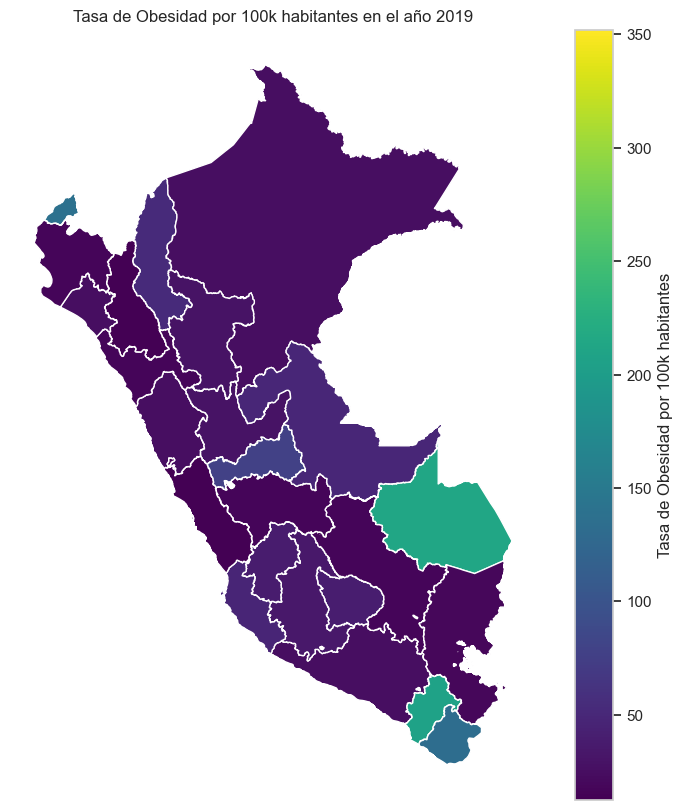

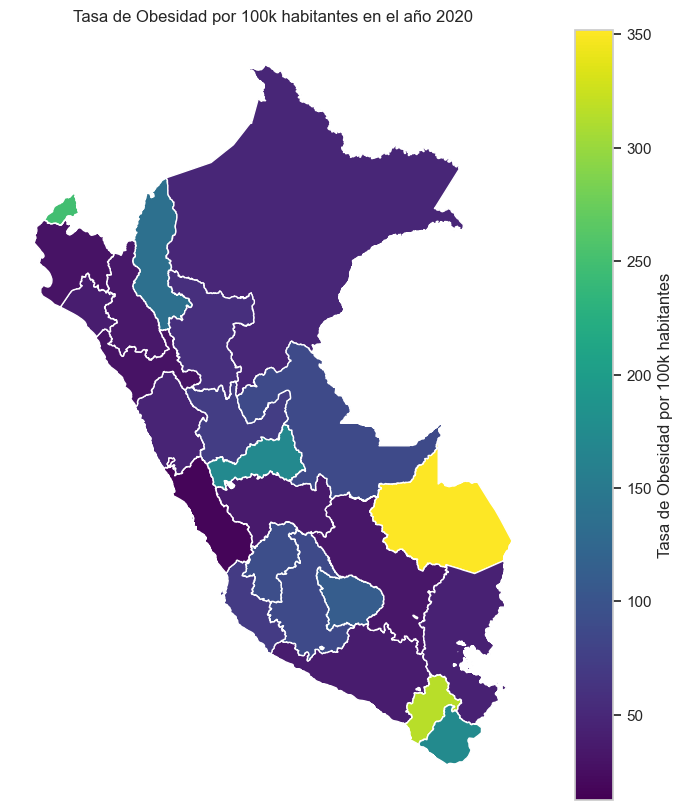

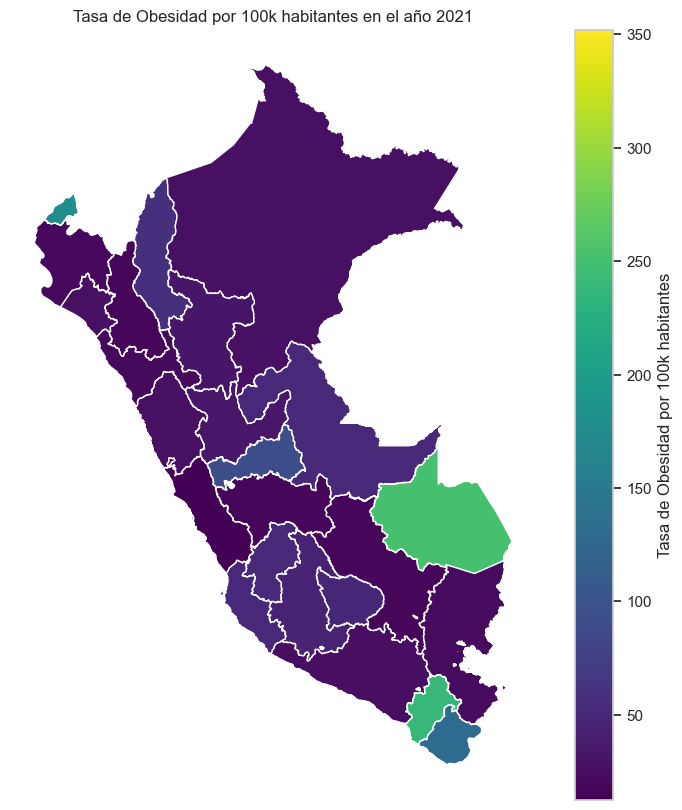

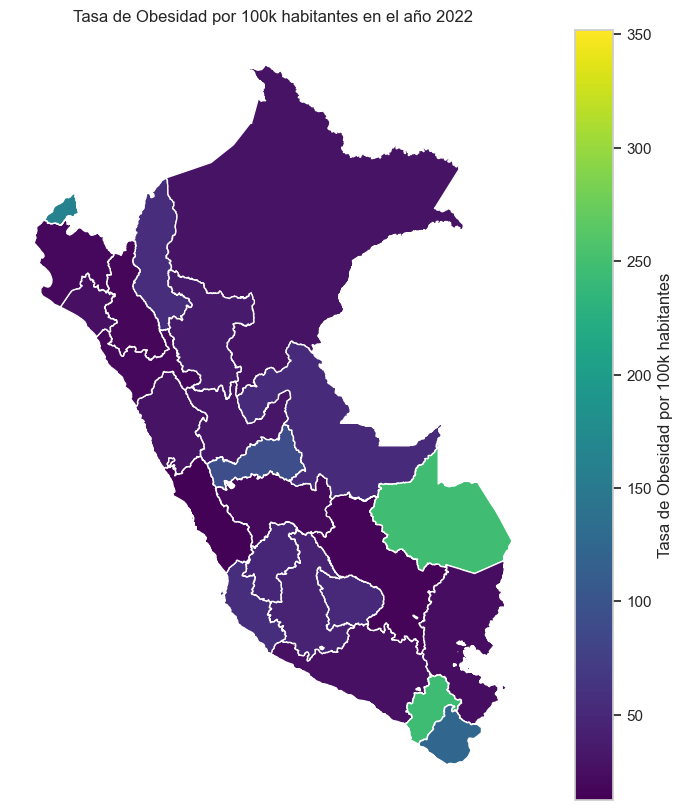

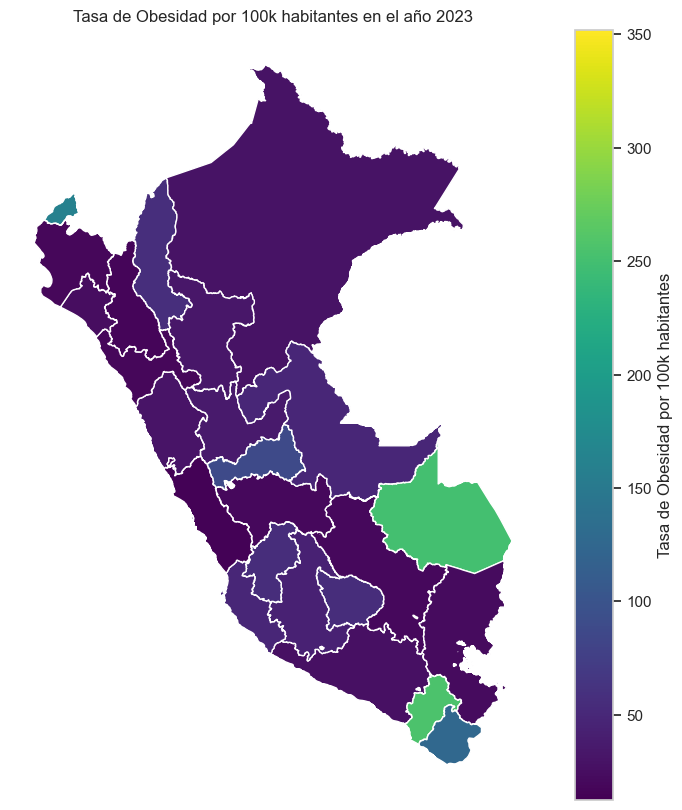

In [279]:
vmin = departamentos_mapa["tasa_obesidad_por_100k"].min()
vmax = departamentos_mapa["tasa_obesidad_por_100k"].max()

for anio in departamentos_mapa["anio"].unique():
    fig, ax = plt.subplots(figsize=(10, 10))
    departamentos_mapa_anio = departamentos_mapa[departamentos_mapa["anio"] == anio]
    
    departamentos_mapa_anio.plot(
        column='tasa_obesidad_por_100k', 
        cmap='viridis',  # Prueba con viridis, plasma o cividis para mejor percepción
        ax=ax, 
        legend=True, 
        legend_kwds={'label': "Tasa de Obesidad por 100k habitantes"},
        vmin=vmin, 
        vmax=vmax  # Fija la escala de colores para evitar distorsión año a año
    )

    ax.set_title(f"Tasa de Obesidad por 100k habitantes en el año {anio}")
    ax.axis('off')
    plt.show()


#### Gráfico de líneas

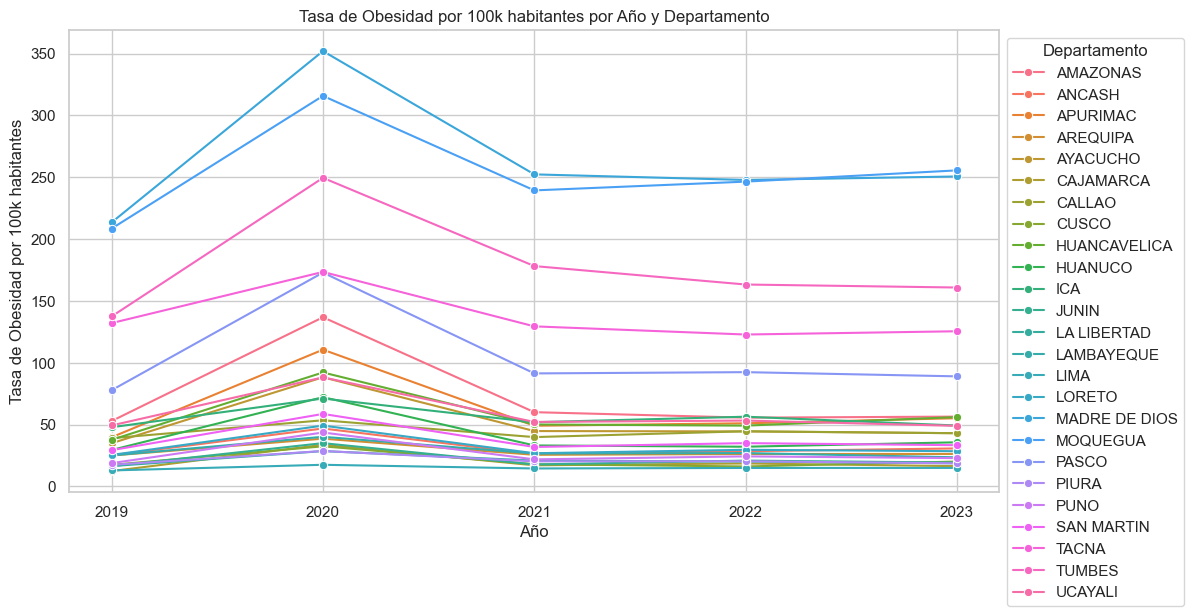

In [280]:
#GRÁFICO DE TENDENCIA
plt.figure(figsize=(12, 6))
sns.lineplot(data=departamentos_mapa, x="anio", y="tasa_obesidad_por_100k", hue="dominio", marker="o")
plt.title("Tasa de Obesidad por 100k habitantes por Año y Departamento")
plt.xlabel("Año")
plt.ylabel("Tasa de Obesidad por 100k habitantes")
plt.legend(title="Departamento", bbox_to_anchor=(1, 1), loc = 'upper left')
plt.grid(True)
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])
plt.show()

### Merge con indice_educacion

In [281]:
df_educacion["dominio"] = df_educacion["dominio"].replace(mapeo_nombres)
df_educacion["dominio"] = df_educacion["dominio"].str.upper()

In [282]:
porcentaje_educacion_anio = df_educacion.merge(departamentos[["DEPARTAMEN", "poblacion_total_2020"]].drop_duplicates(), left_on="dominio", right_on="DEPARTAMEN", how="left")
porcentaje_educacion_anio["tasa_educacion_por_100k"] = (porcentaje_educacion_anio["cantidad_personas"] / porcentaje_educacion_anio["poblacion_total_2020"]) * 100000
porcentaje_educacion_anio.drop(columns=["DEPARTAMEN"], inplace=True)
porcentaje_educacion_anio = porcentaje_educacion_anio.drop_duplicates(subset=["dominio", "anio", "asistio_escuela"])
display(porcentaje_educacion_anio)

dominio  anio asistio_escuela  cantidad_personas  poblacion_total_2020  \
0    AMAZONAS  2019              si               1284                472993   
1    AMAZONAS  2020              si               1308                472993   
2    AMAZONAS  2021              si               1288                472993   
3    AMAZONAS  2022              si               1279                472993   
4    AMAZONAS  2023              si               1270                472993   
..        ...   ...             ...                ...                   ...   
120   UCAYALI  2019              si               1196                632861   
121   UCAYALI  2020              si               1196                632861   
122   UCAYALI  2021              si               1194                632861   
123   UCAYALI  2022              si               1205                632861   
124   UCAYALI  2023              si               1199                632861   

     tasa_educacion_por_100k  
0                 271.462791  
1                 276.536862  
2                 272.308470  
3                 270.405693  
4                 268.502917  
..                       ...  
120               188.983047  
121               188.983047  
122               188.667022  
123               190.405160  
124               189.457085  

[125 rows x 6 columns]

In [283]:
df_educacion["dominio"] = df_educacion["dominio"].str.strip()
departamentos["DEPARTAMEN"] = departamentos["DEPARTAMEN"].str.strip()

print(df_educacion["dominio"].dtype)
print(departamentos["DEPARTAMEN"].dtype)

object
object


#### Mapa de calor

In [284]:
departamentos_mapa_ed = departamentos.merge(porcentaje_educacion_anio, left_on=["DEPARTAMEN", "anio"], right_on=["dominio", "anio"], how="left")

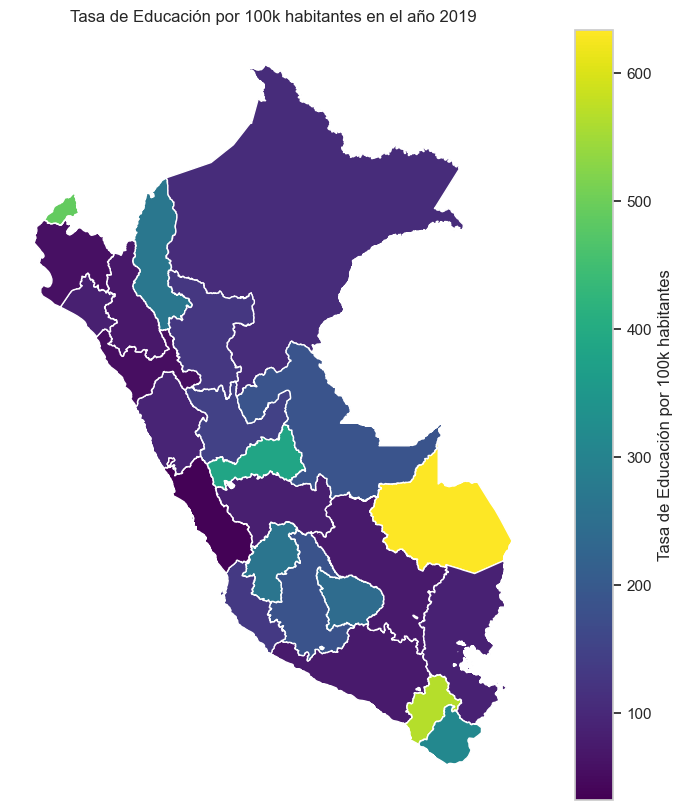

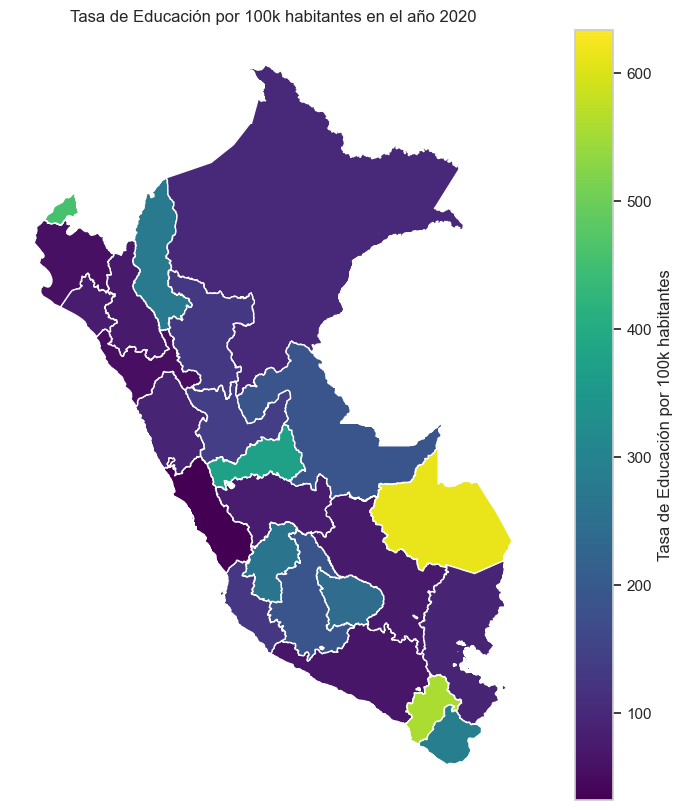

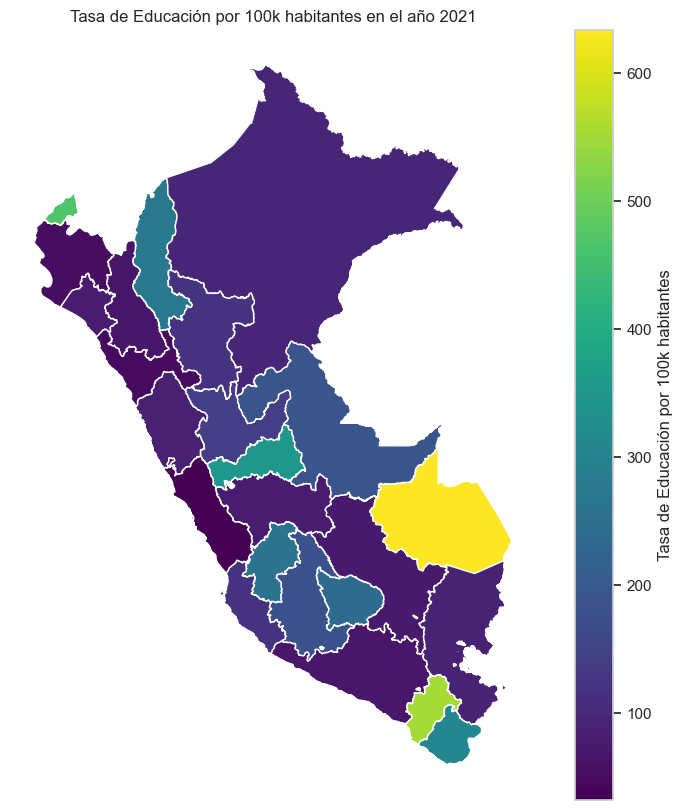

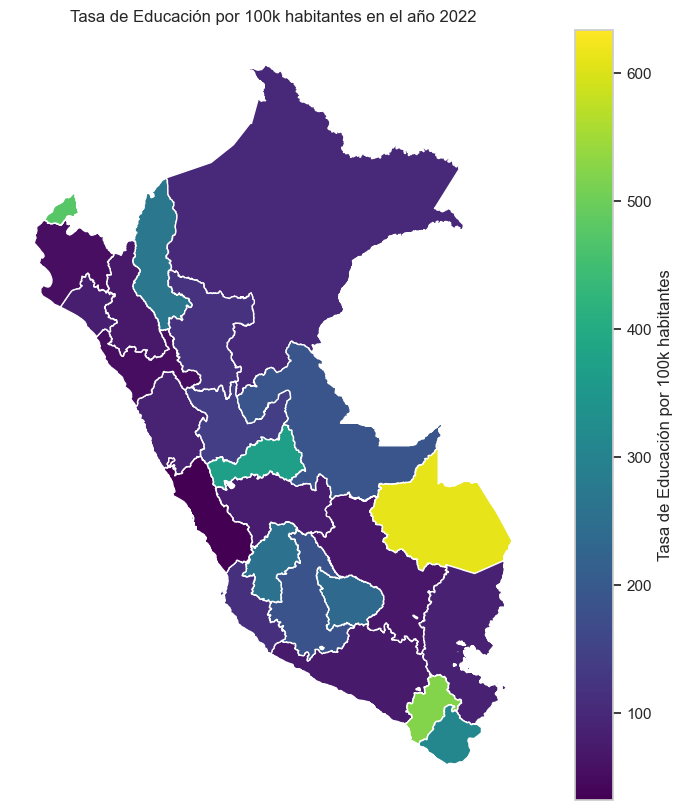

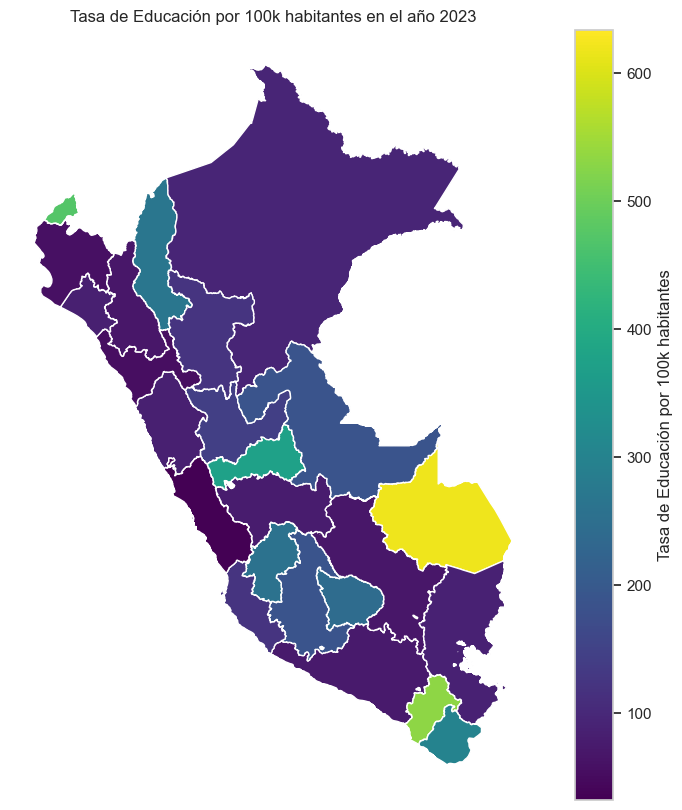

In [286]:
vminEd = departamentos_mapa_ed["tasa_educacion_por_100k"].min()
vmaxEd = departamentos_mapa_ed["tasa_educacion_por_100k"].max()

for anio in departamentos_mapa_ed["anio"].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    departamentos_mapa_anio = departamentos_mapa_ed[departamentos_mapa_ed["anio"] == anio]
    
    departamentos_mapa_anio.plot(
        column='tasa_educacion_por_100k', 
        cmap='viridis',  # Prueba con viridis, plasma o cividis para mejor percepción
        ax=ax, 
        legend=True, 
        legend_kwds={'label': "Tasa de Educación por 100k habitantes"},
        vmin=vminEd, 
        vmax=vmaxEd  # Fija la escala de colores para evitar distorsión año a año
    )

    ax.set_title(f"Tasa de Educación por 100k habitantes en el año {anio}")
    ax.axis('off')
    plt.show()

#### Gráfico de líneas

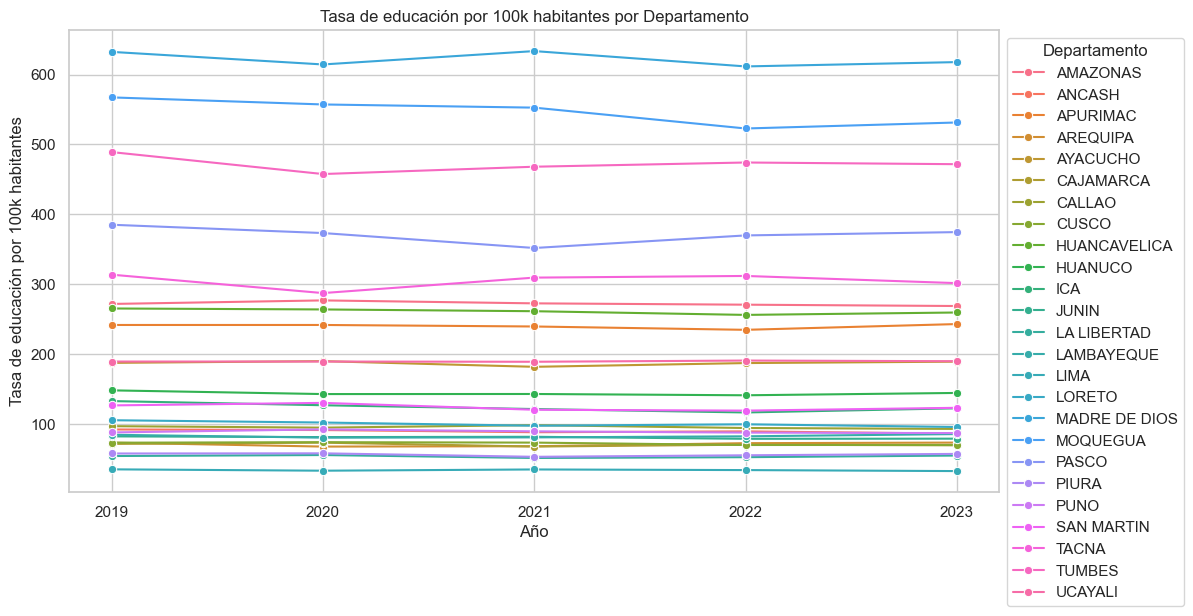

In [287]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=departamentos_mapa_ed, x='anio', y='tasa_educacion_por_100k', hue='dominio', marker='o')
plt.title("Tasa de educación por 100k habitantes por Departamento")
plt.xlabel("Año")
plt.ylabel("Tasa de educación por 100k habitantes")
plt.legend(title="Departamento", bbox_to_anchor=(1, 1), loc = 'upper left')
plt.grid(True)
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])
plt.show()

### Merge con df_hipertension_resumen

In [ ]:
df_hipertension_resumen["dominio"] = df_hipertension_resumen["dominio"].replace(mapeo_nombres)
df_hipertension_resumen["dominio"] = df_hipertension_resumen["dominio"].str.upper()

In [ ]:
porcentaje_hipertension_anio = df_hipertension_resumen.merge(departamentos[["DEPARTAMEN", "poblacion_total_2020"]].drop_duplicates(), left_on="dominio", right_on="DEPARTAMEN", how="left")
porcentaje_hipertension_anio["tasa_hipertension_por_100k"] = (porcentaje_hipertension_anio["cantidad_personas"] / porcentaje_hipertension_anio["poblacion_total_2020"]) * 100000
porcentaje_hipertension_anio.drop(columns=["DEPARTAMEN"], inplace=True)
porcentaje_hipertension_anio = porcentaje_hipertension_anio.drop_duplicates(subset=["dominio", "anio"])
display(porcentaje_hipertension_anio)

dominio  anio  cantidad_personas  total_encuestados  \
0    AMAZONAS  2019                410               1409   
1    AMAZONAS  2020                306               1427   
2    AMAZONAS  2021                428               1387   
3    AMAZONAS  2022                406               1391   
4    AMAZONAS  2023                349               1393   
..        ...   ...                ...                ...   
120   UCAYALI  2019                222               1245   
121   UCAYALI  2020                201               1236   
122   UCAYALI  2021                255               1240   
123   UCAYALI  2022                266               1247   
124   UCAYALI  2023                267               1242   

     porcentaje_hipertension  presion_sistolica_promedio  \
0                   9.699551                  157.510446   
1                   7.147863                  158.241656   
2                  10.285989                  157.361029   
3                   9.729212                  155.751342   
4                   8.351280                  155.956175   
..                       ...                         ...   
120                 5.943775                  162.360545   
121                 5.420712                  157.561203   
122                 6.854839                  155.437373   
123                 7.110398                  157.020874   
124                 7.165862                  155.228485   

     presion_diastolica_promedio  poblacion_total_2020  \
0                      83.801049                472993   
1                      84.796334                472993   
2                      86.815328                472993   
3                      91.923674                472993   
4                      91.599000                472993   
..                           ...                   ...   
120                    80.127854                632861   
121                    85.124448                632861   
122                    87.705329                632861   
123                    89.529170                632861   
124                    95.604666                632861   

     tasa_hipertension_por_100k  
0                     86.682044  
1                     64.694404  
2                     90.487597  
3                     85.836365  
4                     73.785447  
..                          ...  
120                   35.078793  
121                   31.760529  
122                   40.293208  
123                   42.031347  
124                   42.189359  

[125 rows x 9 columns]

In [ ]:
df_hipertension_resumen["dominio"] = df_hipertension_resumen["dominio"].str.strip()
departamentos["DEPARTAMEN"] = departamentos["DEPARTAMEN"].str.strip()

print(df_hipertension_resumen["dominio"].dtype)
print(departamentos["DEPARTAMEN"].dtype)

object
object


In [ ]:
departamentos_mapa_hiper = departamentos.merge(porcentaje_hipertension_anio, left_on=["DEPARTAMEN", "anio"], right_on=["dominio", "anio"], how="left")

#### Mapas de calor por año

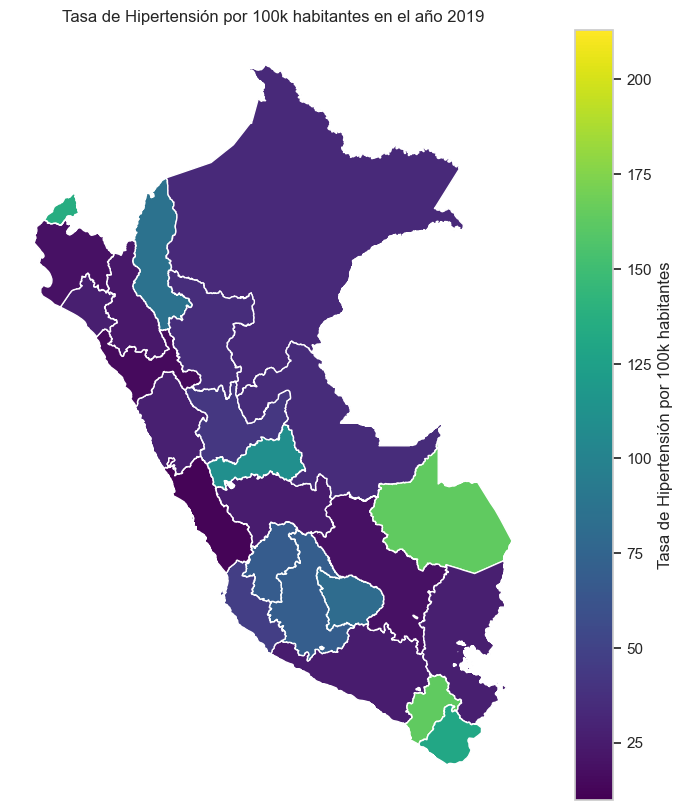

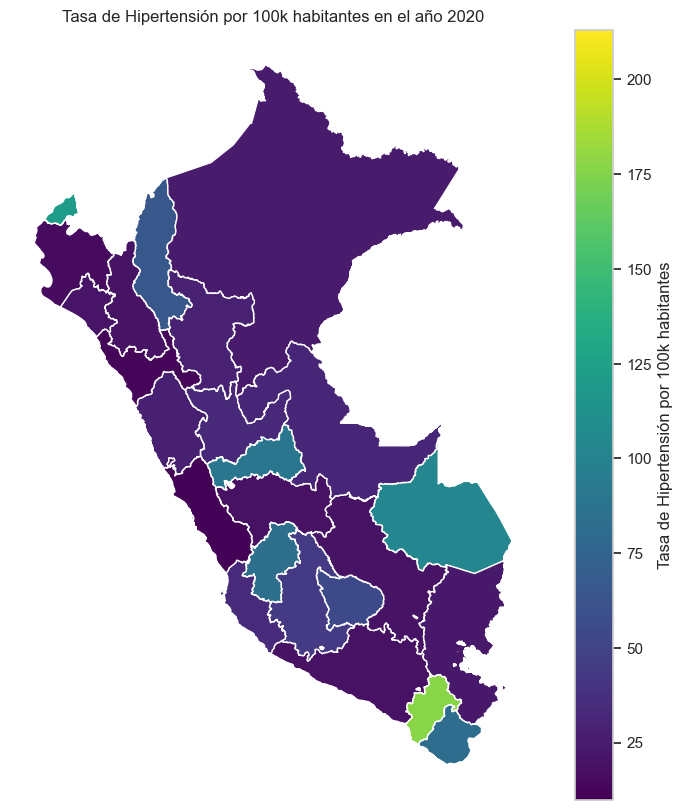

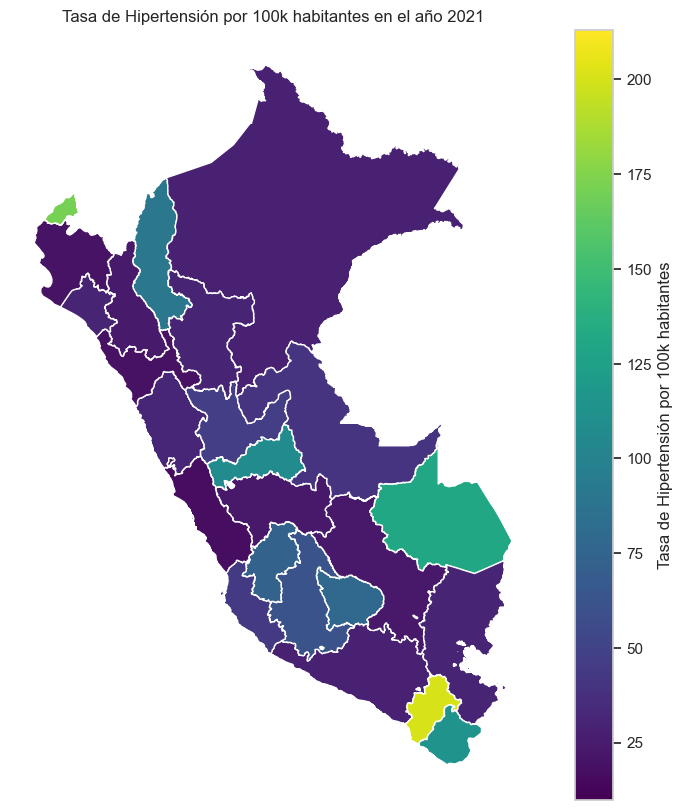

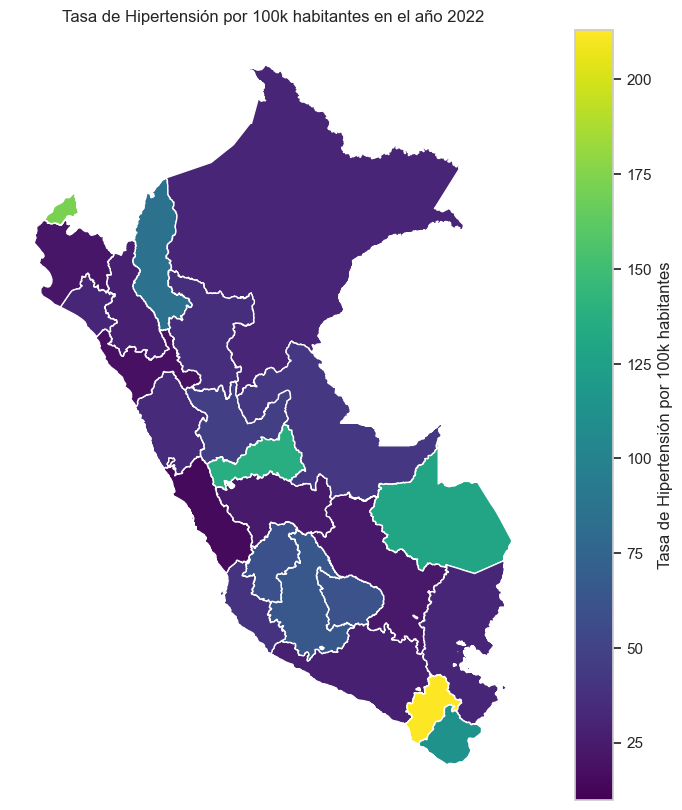

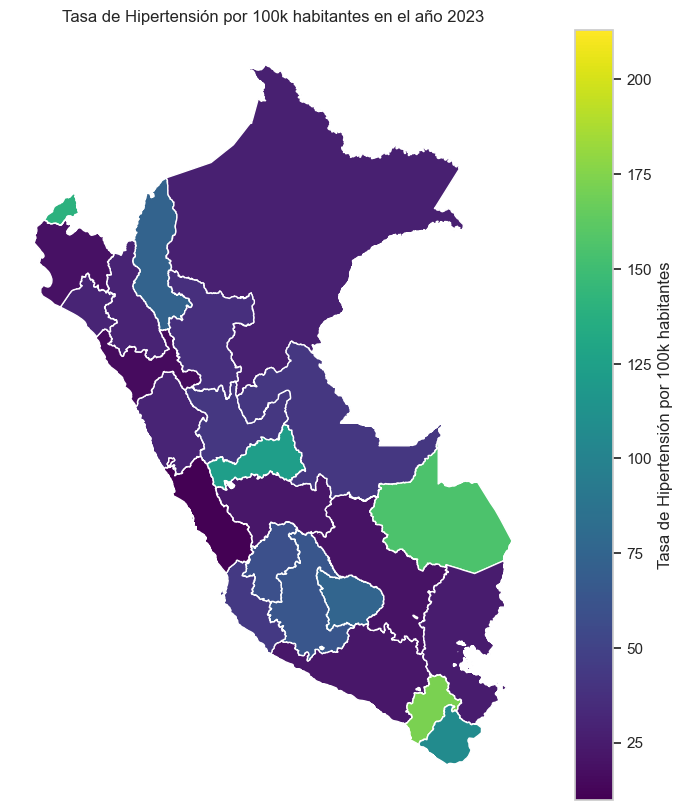

In [ ]:
vminHIP = departamentos_mapa_hiper["tasa_hipertension_por_100k"].min()
vmaxHIP = departamentos_mapa_hiper["tasa_hipertension_por_100k"].max()

for anio in departamentos_mapa_hiper["anio"].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    departamentos_mapa_anio = departamentos_mapa_hiper[departamentos_mapa_hiper["anio"] == anio]
    
    departamentos_mapa_anio.plot(
        column='tasa_hipertension_por_100k', 
        cmap='viridis',  # Prueba con viridis, plasma o cividis para mejor percepción
        ax=ax, 
        legend=True, 
        legend_kwds={'label': "Tasa de Hipertensión por 100k habitantes"},
        vmin=vminHIP, 
        vmax=vmaxHIP  # Fija la escala de colores para evitar distorsión año a año
    )

    ax.set_title(f"Tasa de Hipertensión por 100k habitantes en el año {anio}")
    ax.axis('off')
    plt.show()

#### Gráfico de líneas

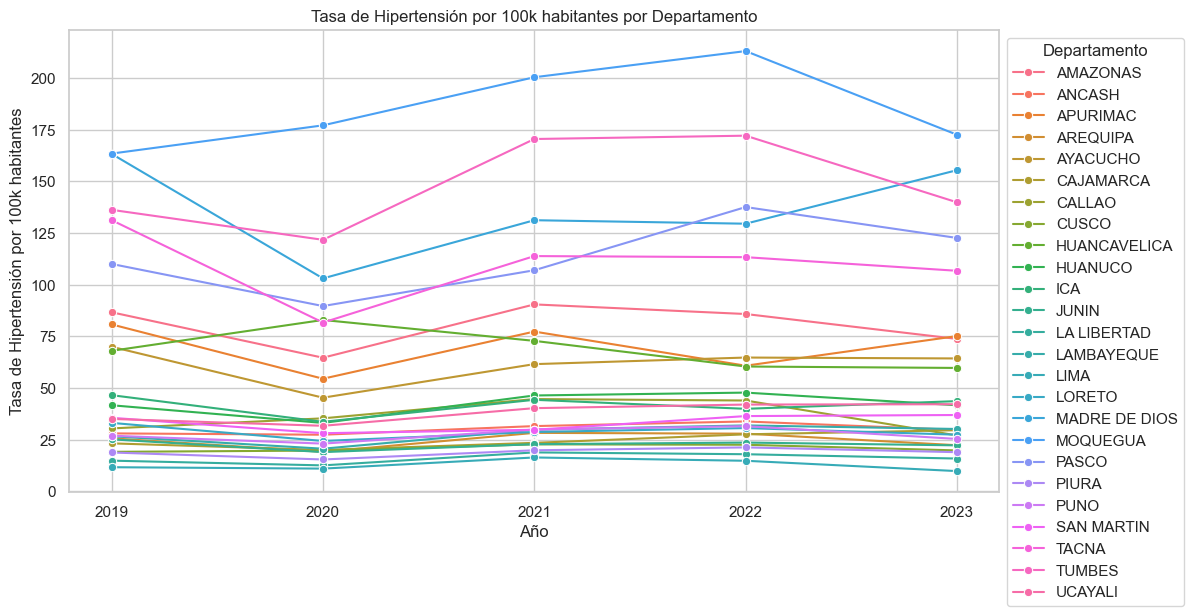

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=departamentos_mapa_hiper, x='anio', y='tasa_hipertension_por_100k', hue='dominio', marker='o')
plt.title("Tasa de Hipertensión por 100k habitantes por Departamento")
plt.xlabel("Año")
plt.ylabel("Tasa de Hipertensión por 100k habitantes")
plt.legend(title="Departamento", bbox_to_anchor=(1, 1), loc = 'upper left')
plt.grid(True)
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])
plt.show()

### Merge con df_obesidad_resumen y df_hipertension_resumen (unión)

In [ ]:
df_union_resumen["dominio"] = df_union_resumen["dominio"].replace(mapeo_nombres)
df_union_resumen["dominio"] = df_union_resumen["dominio"].str.upper()

In [ ]:
porcentaje_union_anio = df_union_resumen.merge(departamentos[["DEPARTAMEN", "poblacion_total_2020"]].drop_duplicates(), left_on="dominio", right_on="DEPARTAMEN", how="left")
porcentaje_union_anio ["tasa_union_por_100k"] = (porcentaje_union_anio["cantidad_personas"] / porcentaje_union_anio["poblacion_total_2020"]) * 100000
porcentaje_union_anio.drop(columns=["DEPARTAMEN"], inplace=True)
porcentaje_union_anio = porcentaje_union_anio.drop_duplicates(subset=["dominio", "anio"])
display(porcentaje_union_anio)

dominio  anio  cantidad_personas  total_encuestados  imc_promedio  \
0    AMAZONAS  2019                 82               1409     36.299653   
1    AMAZONAS  2020                 57               1427     34.450170   
2    AMAZONAS  2021                110               1387     36.241030   
3    AMAZONAS  2022                 88               1391     35.617623   
4    AMAZONAS  2023                 83               1393     36.446143   
..        ...   ...                ...                ...           ...   
120   UCAYALI  2019                 76               1245     36.818005   
121   UCAYALI  2020                 64               1236     37.338999   
122   UCAYALI  2021                 89               1240     37.168640   
123   UCAYALI  2022                 93               1247     37.140156   
124   UCAYALI  2023                114               1242     36.823178   

     perimetro_abdominal_promedio  presion_sistolica_promedio  \
0                      110.810908                  145.106302   
1                      108.845723                  155.441248   
2                      110.263998                  145.390929   
3                      111.187079                  146.908670   
4                      111.254356                  144.692232   
..                            ...                         ...   
120                    110.384082                  147.582080   
121                    111.282568                  139.781916   
122                    111.665303                  153.823227   
123                    108.078224                  138.328776   
124                    109.194274                  147.080058   

     presion_diastolica_promedio  porcentaje_obesidad_hipertension  \
0                      86.776398                          0.831390   
1                      88.562390                          0.665732   
2                      87.357560                          1.132969   
3                      92.647096                          1.054397   
4                      88.854048                          0.851195   
..                           ...                               ...   
120                    80.749969                          0.872060   
121                    80.613311                          0.862999   
122                    90.564874                          0.797491   
123                    88.171618                          1.242983   
124                    91.479714                          1.311249   

     poblacion_total_2020  tasa_union_por_100k  
0                  472993            17.336409  
1                  472993            12.050918  
2                  472993            23.256158  
3                  472993            18.604926  
4                  472993            17.547828  
..                    ...                  ...  
120                632861            12.008956  
121                632861            10.112805  
122                632861            14.063120  
123                632861            14.695170  
124                632861            18.013434  

[125 rows x 11 columns]

In [ ]:
df_union_resumen["dominio"] = df_union_resumen["dominio"].str.strip()
departamentos["DEPARTAMEN"] = departamentos["DEPARTAMEN"].str.strip()

print(df_union_resumen["dominio"].dtype)
print(departamentos["DEPARTAMEN"].dtype)

object
object


In [ ]:
departamentos_mapa_union = departamentos.merge(porcentaje_union_anio, left_on=["DEPARTAMEN", "anio"], right_on=["dominio", "anio"], how="left")

#### Mapas de calor por año

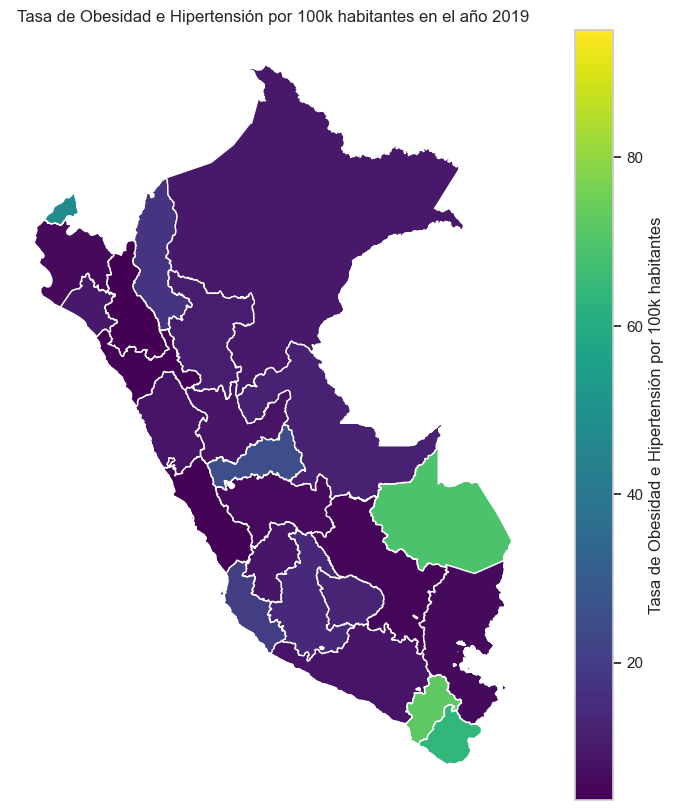

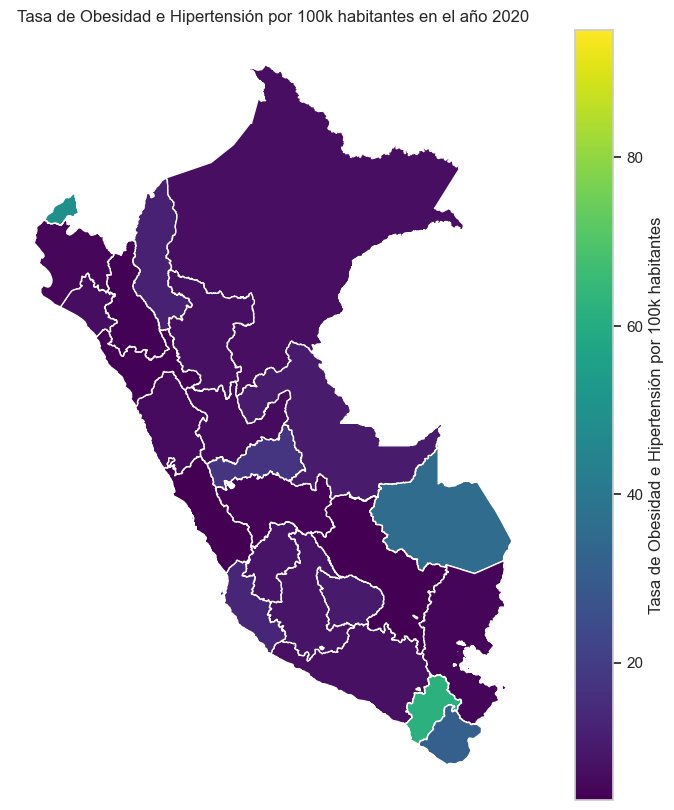

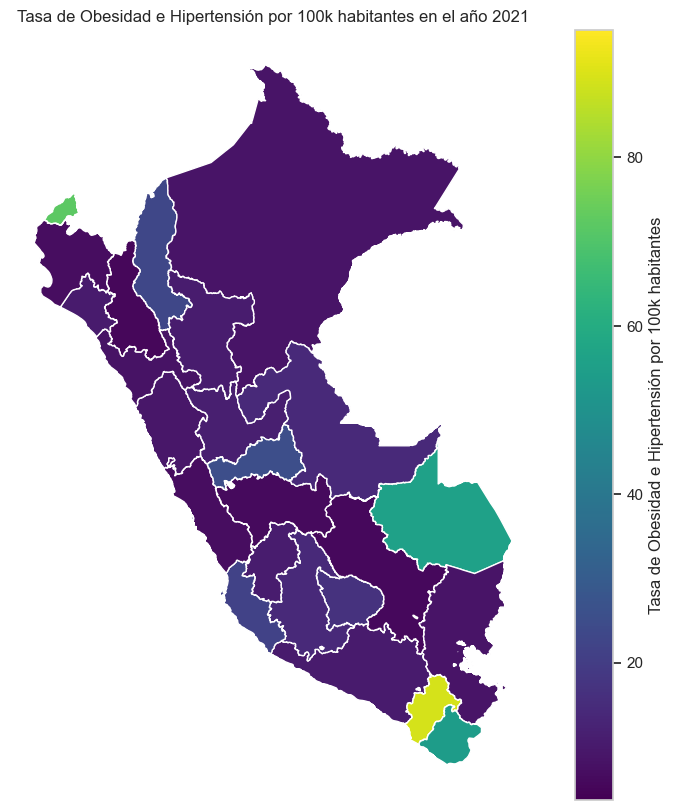

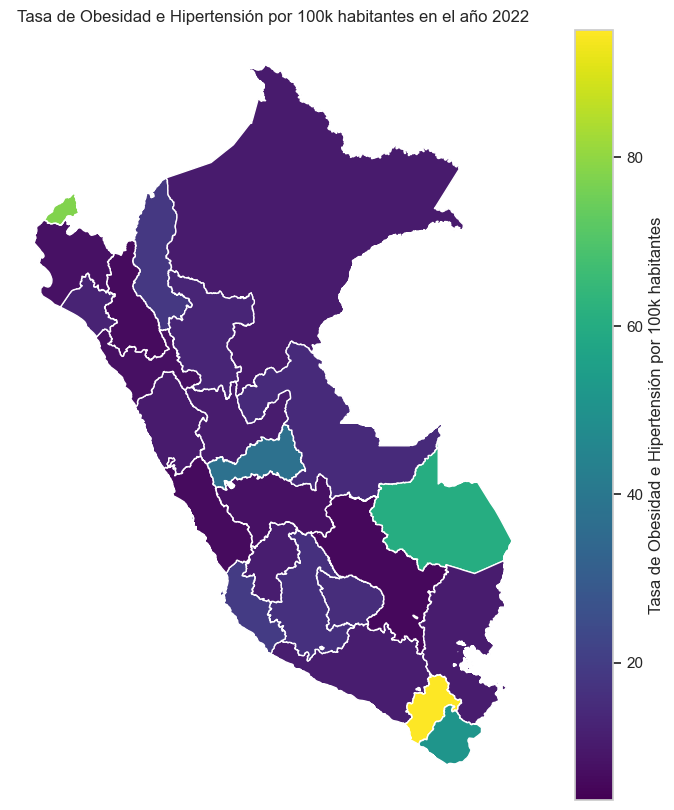

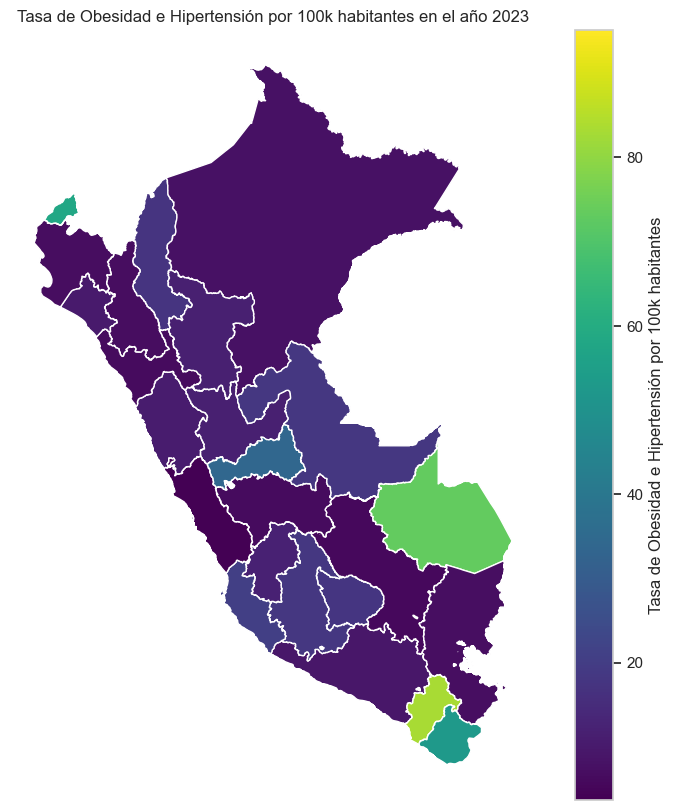

In [ ]:
vminUN = departamentos_mapa_union["tasa_union_por_100k"].min()
vmaxUN = departamentos_mapa_union["tasa_union_por_100k"].max()

for anio in departamentos_mapa_union["anio"].unique():
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    departamentos_mapa_anio = departamentos_mapa_union[departamentos_mapa_union["anio"] == anio]
    
    departamentos_mapa_anio.plot(
        column='tasa_union_por_100k', 
        cmap='viridis',  # Prueba con viridis, plasma o cividis para mejor percepción
        ax=ax, 
        legend=True, 
        legend_kwds={'label': "Tasa de Obesidad e Hipertensión por 100k habitantes"},
        vmin=vminUN, 
        vmax=vmaxUN  # Fija la escala de colores para evitar distorsión año a año
    )

    ax.set_title(f"Tasa de Obesidad e Hipertensión por 100k habitantes en el año {anio}")
    ax.axis('off')
    plt.show()

#### Gráfico de líneas

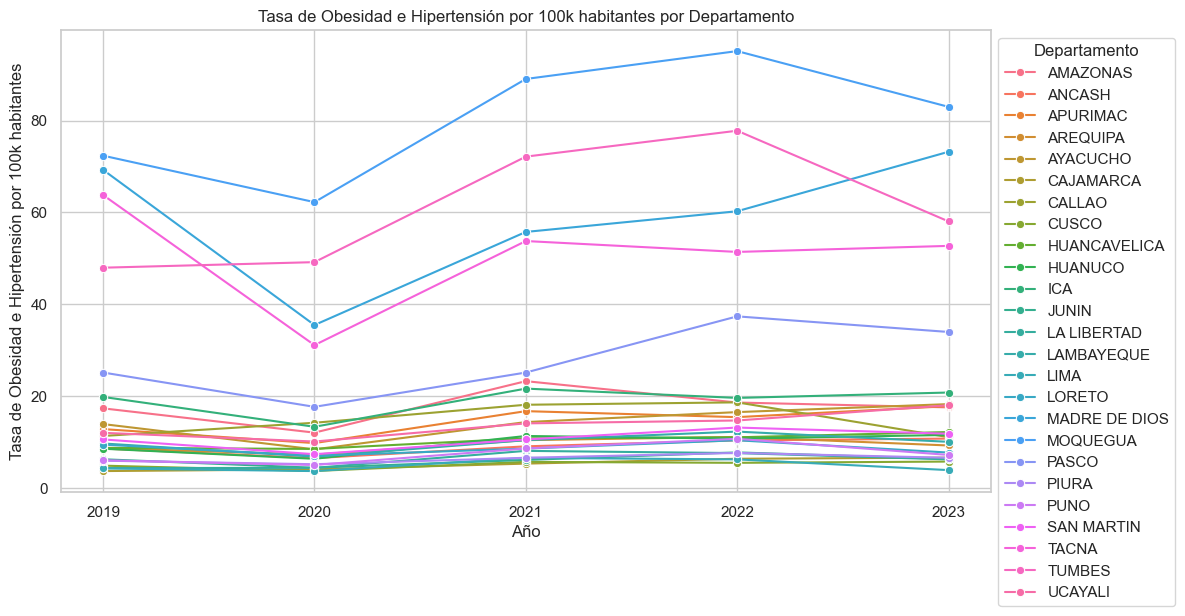

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=departamentos_mapa_union, x='anio', y='tasa_union_por_100k', hue='dominio', marker='o')
plt.title("Tasa de Obesidad e Hipertensión por 100k habitantes por Departamento")
plt.xlabel("Año")
plt.ylabel("Tasa de Obesidad e Hipertensión por 100k habitantes")
plt.legend(title="Departamento", bbox_to_anchor=(1, 1), loc = 'upper left')
plt.grid(True)
plt.xticks(ticks=[2019, 2020, 2021, 2022, 2023], labels=[2019, 2020, 2021, 2022, 2023])
plt.show()

#### Separación

In [ ]:
# porcentaje_obesidad_anio.to_csv("porcentaje_obesidad.csv", index=False)
# porcentaje_hipertension_anio.to_csv("porcentaje_hipertension.csv", index=False)
# porcentaje_union_anio.to_csv("porcentaje_union.csv", index=False)
#porcentaje_educacion_anio.to_csv("porcentaje_educacion.csv", index=False)